<a href="https://colab.research.google.com/github/ShrudhiChaudhary/Retail-price-prediction-Shrudhi/blob/main/Retail_Sales_price_Prediction_Capstone_Project_Cohort_Azzadi_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Retail Sales Price Prediction (Regression)



##### **Project Type**    - EDA/Regression
##### **Contribution**    - Individual
##### **Team Member -** Shrudhi Chaudhary

# **Project Summary -**

### This project aims to predict the prices of sales for Rossman stores. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. Various models have been tried and tested to train and test the model. The model has been first cleaned and then data wrangling process has been done. The effect of various independent variables on dependent variables has been visualized. Highly co-related variables have been removed or modified in order to make the model more accurate. Finally the model has been trained and tested using Ridge regression , Decision tree and Random forest algorithm. Random forest algorithm has proved to be the most accurate model to predict the sales.







# **GitHub Link -**

# **Problem Statement**


## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import *
import math
from matplotlib.pylab import rcParams
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics.pairwise import euclidean_distances

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler  

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Copy of store.csv')

In [4]:
ross_data = pd.read_csv('/content/drive/MyDrive/Rossmann Stores Data.csv')

### Dataset First View

In [ ]:
# Dataset First Look
data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
ross_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data.shape

(1115, 10)

In [ ]:
ross_data.shape

(1017209, 9)

### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
ross_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
data.duplicated().sum()

In [ ]:
ross_data.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

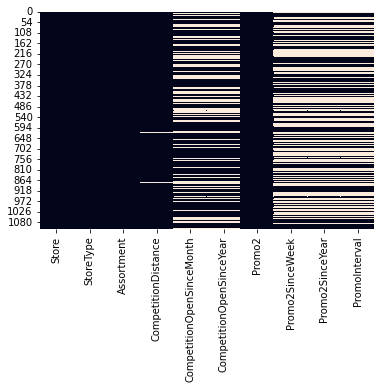

In [ ]:
# Visualizing the missing values
sns.heatmap(data.isnull(), cbar=False)

In [ ]:
ross_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

### What did you know about your dataset?

There are 2 datasets named store and rossman data. Both have common primary key as Store ID and hence can be joined. Both have 8-9 columns

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
ross_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
# Dataset Describe
data.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [ ]:
ross_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


### Variables Description 

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in data.columns.tolist():
  print("No. of unique values in ",i,"is",data[i].nunique(),".")

No. of unique values in  Store is 1115 .
No. of unique values in  StoreType is 4 .
No. of unique values in  Assortment is 3 .
No. of unique values in  CompetitionDistance is 654 .
No. of unique values in  CompetitionOpenSinceMonth is 12 .
No. of unique values in  CompetitionOpenSinceYear is 23 .
No. of unique values in  Promo2 is 2 .
No. of unique values in  Promo2SinceWeek is 24 .
No. of unique values in  Promo2SinceYear is 7 .
No. of unique values in  PromoInterval is 3 .


In [ ]:
for i in ross_data.columns.tolist():
  print("No. of unique values in ",i,"is",ross_data[i].nunique(),".")

No. of unique values in  Store is 1115 .
No. of unique values in  DayOfWeek is 7 .
No. of unique values in  Date is 942 .
No. of unique values in  Sales is 21734 .
No. of unique values in  Customers is 4086 .
No. of unique values in  Open is 2 .
No. of unique values in  Promo is 2 .
No. of unique values in  StateHoliday is 5 .
No. of unique values in  SchoolHoliday is 2 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [5]:
# Write your code to make your dataset analysis ready.
# First we need to join both the datasets
# All types of joins will give the same result
df3 = pd.merge(data, ross_data)
df3

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-05,4771,339,1,0,0,1
1017205,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,2013-01-04,4540,326,1,0,0,1
1017206,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-03,4297,300,1,0,0,1
1017207,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",3,2013-01-02,3697,305,1,0,0,1


In [6]:
df3 = df3.reset_index()
df3

,index,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1017204,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-05,4771,339,1,0,0,1
1017205,1017205,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,2013-01-04,4540,326,1,0,0,1
1017206,1017206,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-03,4297,300,1,0,0,1
1017207,1017207,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",3,2013-01-02,3697,305,1,0,0,1


In [7]:
df4 = df3.drop(['Store'], axis=1)

In [8]:
df4.rename(columns = {'index':'Store'}, inplace = True)
df4

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,2,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,3,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,4,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1017204,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-05,4771,339,1,0,0,1
1017205,1017205,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,2013-01-04,4540,326,1,0,0,1
1017206,1017206,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-03,4297,300,1,0,0,1
1017207,1017207,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",3,2013-01-02,3697,305,1,0,0,1


In [ ]:
df4.isnull().sum()

Store                             0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
dtype: int64

In [9]:
df5 = df4.fillna(method="ffill")
df5

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,2,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,3,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,4,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1017204,d,c,5350.0,4.0,2006.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-05,4771,339,1,0,0,1
1017205,1017205,d,c,5350.0,4.0,2006.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,2013-01-04,4540,326,1,0,0,1
1017206,1017206,d,c,5350.0,4.0,2006.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-03,4297,300,1,0,0,1
1017207,1017207,d,c,5350.0,4.0,2006.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",3,2013-01-02,3697,305,1,0,0,1


In [10]:
df6 = df5.fillna(method="bfill")
df6

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,0,c,a,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",4,2015-07-30,5020,546,1,1,0,1
2,2,c,a,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",3,2015-07-29,4782,523,1,1,0,1
3,3,c,a,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",2,2015-07-28,5011,560,1,1,0,1
4,4,c,a,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",1,2015-07-27,6102,612,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1017204,d,c,5350.0,4.0,2006.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-05,4771,339,1,0,0,1
1017205,1017205,d,c,5350.0,4.0,2006.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,2013-01-04,4540,326,1,0,0,1
1017206,1017206,d,c,5350.0,4.0,2006.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-03,4297,300,1,0,0,1
1017207,1017207,d,c,5350.0,4.0,2006.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",3,2013-01-02,3697,305,1,0,0,1


In [ ]:
df6.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
dtype: int64

### What all manipulations have you done and insights you found?

I have just filled the null values with the most suitable values as the amount of null values were around 50% of the dataset

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

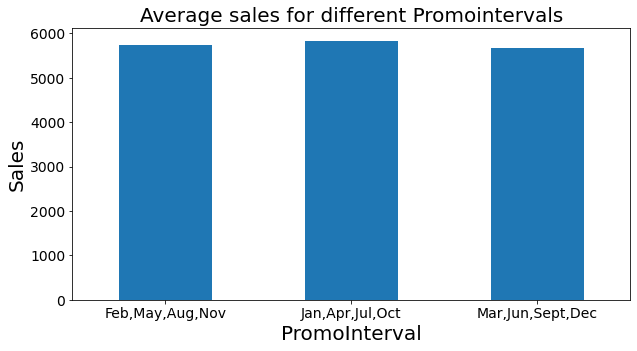

In [ ]:
# Chart - 1 visualization code
ax = df6.groupby(['PromoInterval'])['Sales'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)

# Set the title
plt.title("Average sales for different Promointervals", fontsize = 20)

# Set x and y-labels
plt.xlabel("PromoInterval", fontsize = 20)
plt.ylabel("Sales", fontsize = 20)
plt.xticks(rotation = 0)

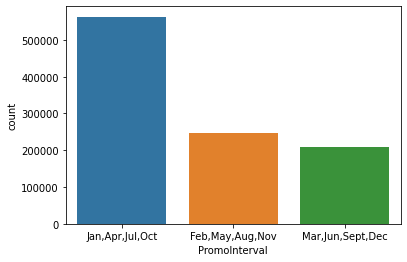

In [ ]:
sns.countplot(data=df6,x='PromoInterval')

##### 1. Why did you pick the specific chart?

Answer - In order to understand the effect of Promo Interval on the target variable i.e Sales and also if required we can eleminate this column if it does not affect the target varible much 

##### 2. What is/are the insight(s) found from the chart?

From the above graph it is clear that , Promo Interval doesn't have any effect on the Sales and it is same for every interval, so we can eleminate this feature. Considering this feature may also require extra compution and re-assignment of the data varaible as it is in categorical format

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Not much effective on sales 

#### Chart - 2

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

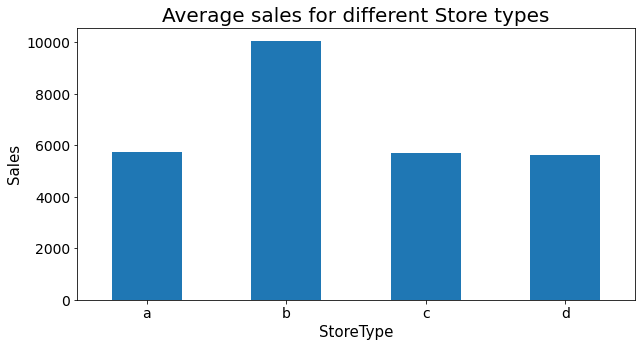

In [ ]:
# Chart - 2 visualization code
ax = df6.groupby(['StoreType'])['Sales'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14,
)

# Set the title
ax.set_title("Average sales for different Store types", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("StoreType", fontsize = 15)
ax.set_ylabel("Sales", fontsize = 15)
plt.xticks(rotation = 0)

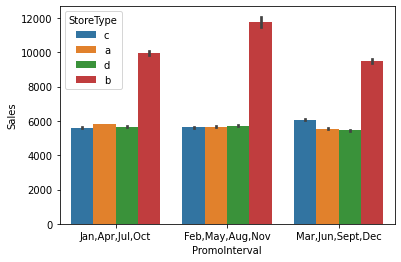

In [ ]:
sns.barplot(data=df6, x="PromoInterval", y="Sales", hue="StoreType")

##### 1. Why did you pick the specific chart?

*To study the avergae sales for each type of store*

##### 2. What is/are the insight(s) found from the chart?

*Store b has the highest sales*

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Shows which type of store needs more promotion and improvement in sales

#### Chart - 3

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

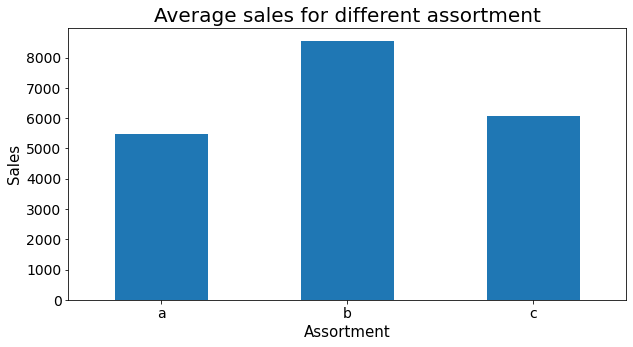

In [ ]:
# Chart - 3 visualization code
ax = df6.groupby(['Assortment'])['Sales'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14,
)

# Set the title
ax.set_title("Average sales for different assortment", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("Assortment", fontsize = 15)
ax.set_ylabel("Sales", fontsize = 15)
plt.xticks(rotation = 0)

##### 1. Why did you pick the specific chart?

To study the assortment level , here a represents basic, b = extra and c represents extended

##### 2. What is/are the insight(s) found from the chart?

Assortment level for extra is the highest and so it is has an impact on the target variable , so we need to convert the categorical data into numeric 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The assortment level helps to increase the sales

#### Chart - 4

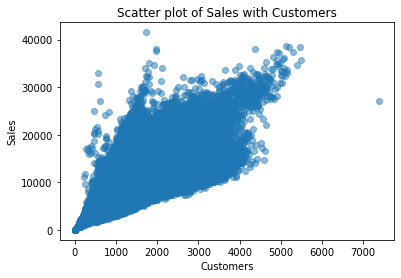

In [ ]:
# Chart - 4 visualization code
plt.scatter(df6['Customers'], df6['Sales'], alpha=0.5)
plt.title('Scatter plot of Sales with Customers')
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

##### 1. Why did you pick the specific chart?

To study the effect of number of customers on sales  

##### 2. What is/are the insight(s) found from the chart?

As the number of cutomers increases , sales increases , hence it is linearly related to each other and stands as an important feature for predicting sales

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Helps in increasing the sales and creates positive business impact

#### Chart - 5

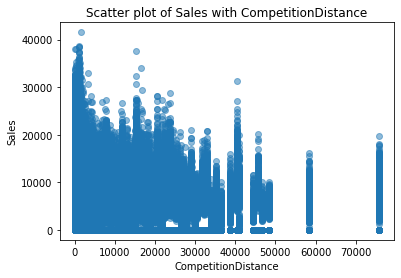

In [ ]:
# Chart - 5 visualization code
plt.scatter(df6['CompetitionDistance'], df6['Sales'], alpha=0.5)
plt.title('Scatter plot of Sales with CompetitionDistance')
plt.xlabel('CompetitionDistance')
plt.ylabel('Sales')
plt.show()

##### 1. Why did you pick the specific chart?

To study the variation of competition distance and its effect on sales prediction

##### 2. What is/are the insight(s) found from the chart?

Competition distance doesn't have any significant effect on sales prediction

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Not much 

#### Chart - 6

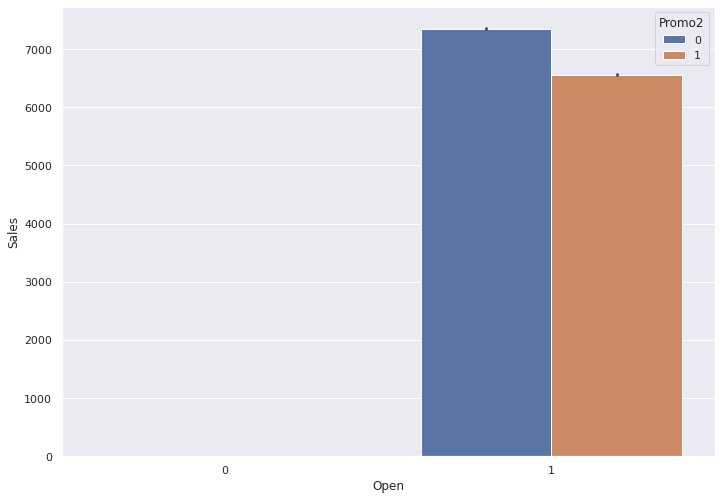

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(data=df6, x="Open", y="Sales", hue="Promo2")

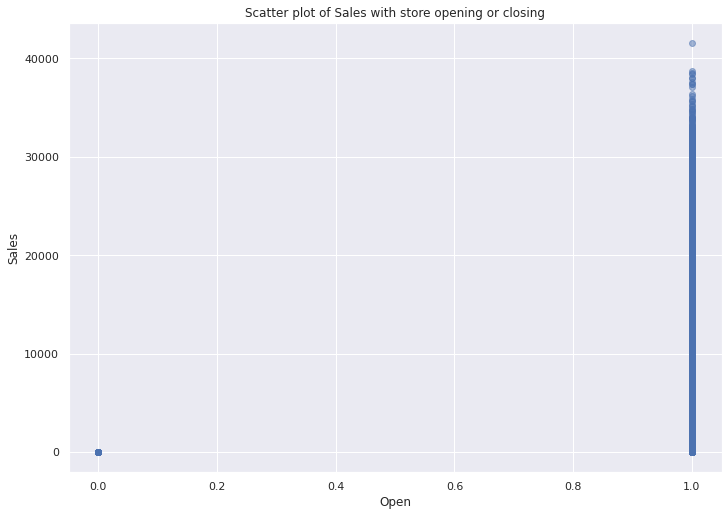

In [ ]:
# Chart - 6 visualization code
plt.scatter(df6['Open'], df6['Sales'], alpha=0.5)
plt.title('Scatter plot of Sales with store opening or closing')
plt.xlabel('Open')
plt.ylabel('Sales')
plt.show()

##### 1. Why did you pick the specific chart?

To study the effect of sales on opening and closing of shop

##### 2. What is/are the insight(s) found from the chart?

Logically when the stores are open then only the sales will be high and hence helping in prediction. 
Therefore by eleminating when the Open = 0

In [11]:
df7 = df6[(df6['Open'] == 1)]
df7

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,0,c,a,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",4,2015-07-30,5020,546,1,1,0,1
2,2,c,a,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",3,2015-07-29,4782,523,1,1,0,1
3,3,c,a,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",2,2015-07-28,5011,560,1,1,0,1
4,4,c,a,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",1,2015-07-27,6102,612,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017202,1017202,d,c,5350.0,4.0,2006.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,2013-01-07,6905,471,1,1,0,1
1017204,1017204,d,c,5350.0,4.0,2006.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-05,4771,339,1,0,0,1
1017205,1017205,d,c,5350.0,4.0,2006.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,2013-01-04,4540,326,1,0,0,1
1017206,1017206,d,c,5350.0,4.0,2006.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-03,4297,300,1,0,0,1


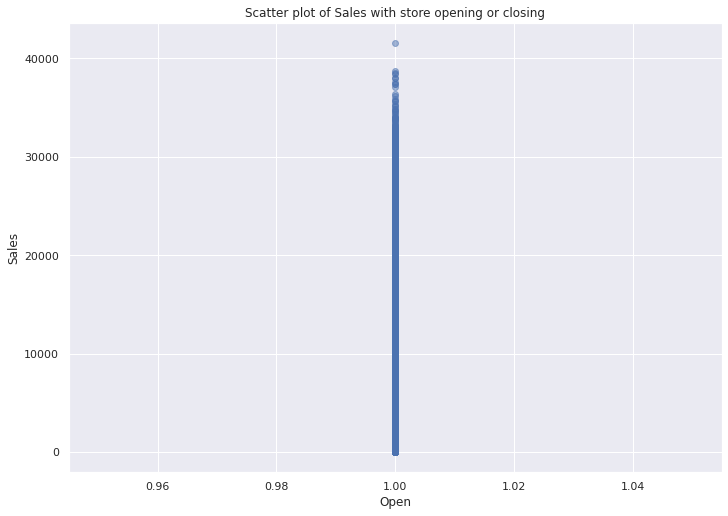

In [ ]:
plt.scatter(df7['Open'], df7['Sales'], alpha=0.5)
plt.title('Scatter plot of Sales with store opening or closing')
plt.xlabel('Open')
plt.ylabel('Sales')
plt.show()

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There are no negative impacts on business growth

#### Chart - 7

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

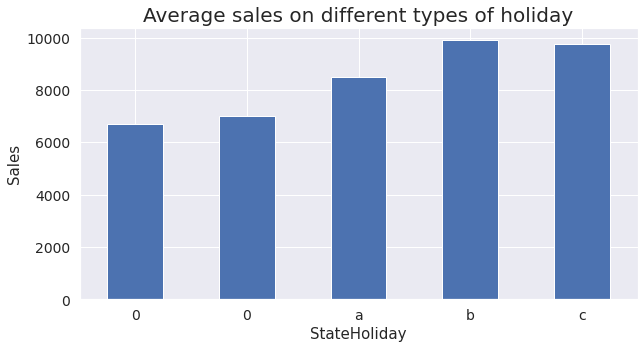

In [ ]:
# Chart - 7 visualization code
ax = df7.groupby(['StateHoliday'])['Sales'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14,
)

# Set the title
ax.set_title("Average sales on different types of holiday", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("StateHoliday", fontsize = 15)
ax.set_ylabel("Sales", fontsize = 15)
plt.xticks(rotation = 0)

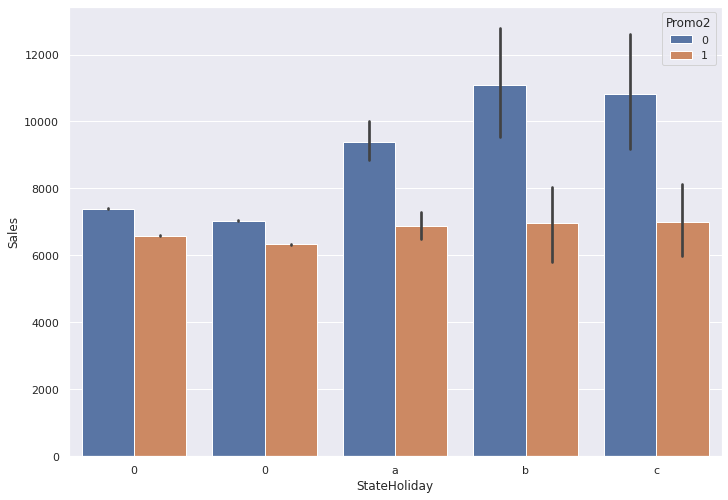

In [ ]:
sns.barplot(data=df7, x="StateHoliday", y="Sales", hue="Promo2")

In [ ]:
df7.StateHoliday.unique() # duplicate values for both the 0's

array(['0', 0, 'a', 'b', 'c'], dtype=object)

In [ ]:
dd = df6[(df6['StateHoliday'] == 0)]
dd

##### 1. Why did you pick the specific chart?

To study on which type of holidays the sales are highest

##### 2. What is/are the insight(s) found from the chart?

Type b and c have highest sales even when the stores are not even open at the time of promotion

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It relates sales , holidays and promotion 

#### Chart - 8

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

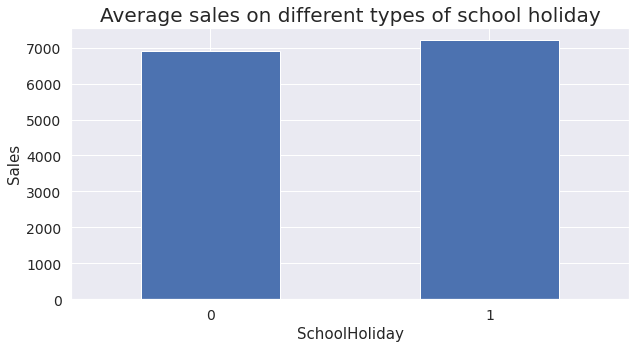

In [ ]:
# Chart - 8 visualization code
ax = df7.groupby(['SchoolHoliday'])['Sales'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14,
)

# Set the title
ax.set_title("Average sales on different types of school holiday", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("SchoolHoliday", fontsize = 15)
ax.set_ylabel("Sales", fontsize = 15)
plt.xticks(rotation = 0)

##### 1. Why did you pick the specific chart?

To study the effect of School Holidays on sales

##### 2. What is/are the insight(s) found from the chart?

0 means schools were closed and 1 mean schools were open , so when the schools were open the sales is comparitively higher than sales when schools were closed 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Promotion can be increased when schools are re-opened to increase the sales

#### Chart - 9

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

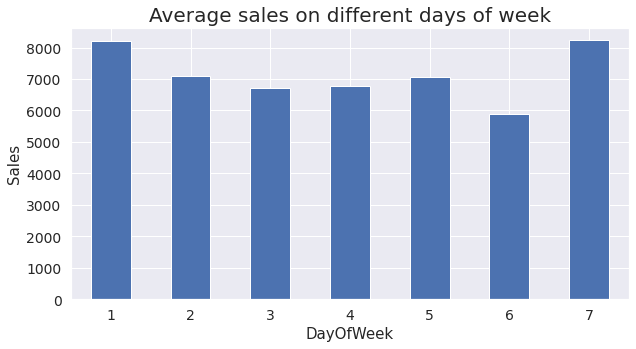

In [ ]:
# Chart - 9 visualization code
ax = df7.groupby(['DayOfWeek'])['Sales'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14,
)

# Set the title
ax.set_title("Average sales on different days of week", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("DayOfWeek", fontsize = 15)
ax.set_ylabel("Sales", fontsize = 15)
plt.xticks(rotation = 0)

##### 1. Why did you pick the specific chart?

To study on which days of week is the sales higher than others

##### 2. What is/are the insight(s) found from the chart?

Sales on 1st and 7th day of the week is maximum so the shop owner can try to promote and scale his business on 1st and 7th day of the week

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Increase the sales on weekends

#### Chart - 10

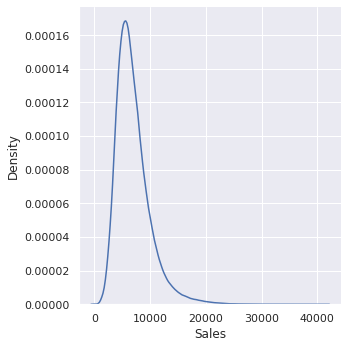

In [ ]:
# Chart - 10 visualization code
sns.set(rc={'figure.figsize':(7,7)})
sns.displot(data=df7, x='Sales', kind="kde")

In [ ]:
df7.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,8.443920e+05,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.0,844392.000000,844392.000000
mean,5.085978e+05,5448.521433,7.234232,2008.589299,0.498684,23.986269,2011.774875,3.520361,6955.514291,762.728395,1.0,0.446352,0.193580
std,2.934822e+05,7802.067731,3.185199,6.618190,0.499999,14.113588,1.663108,1.723689,3104.214680,401.227674,0.0,0.497114,0.395103
min,0.000000e+00,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,2.545218e+05,710.000000,4.000000,2006.000000,0.000000,13.000000,2011.000000,2.000000,4859.000000,519.000000,1.0,0.000000,0.000000
50%,5.082595e+05,2320.000000,7.000000,2010.000000,0.000000,22.000000,2012.000000,3.000000,6369.000000,676.000000,1.0,0.000000,0.000000
75%,7.626812e+05,6880.000000,10.000000,2012.000000,1.000000,37.000000,2013.000000,5.000000,8360.000000,893.000000,1.0,1.000000,0.000000
max,1.017207e+06,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000,7.000000,41551.000000,7388.000000,1.0,1.000000,1.000000


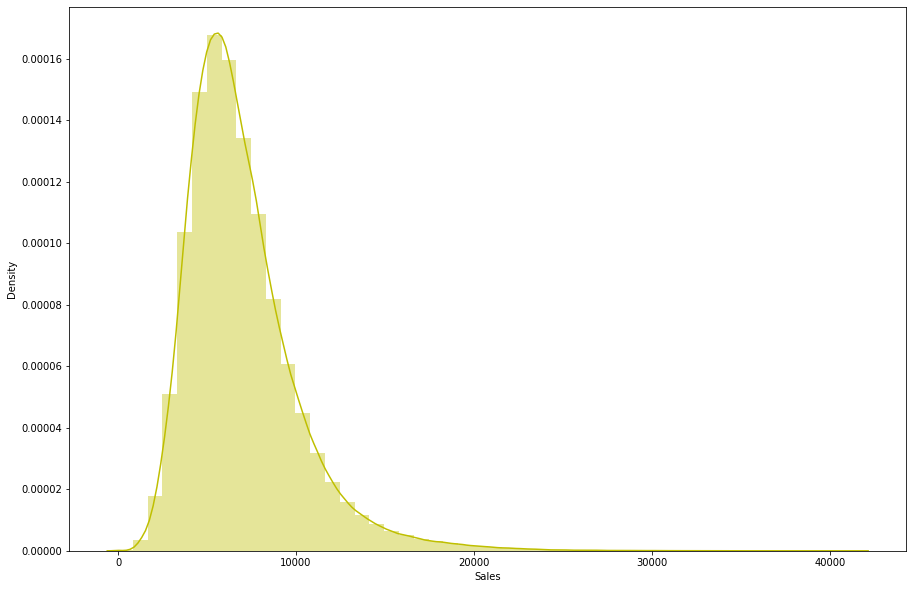

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(df7['Sales'],color="y")

In [12]:
dh = df7[df7.Sales > 0]

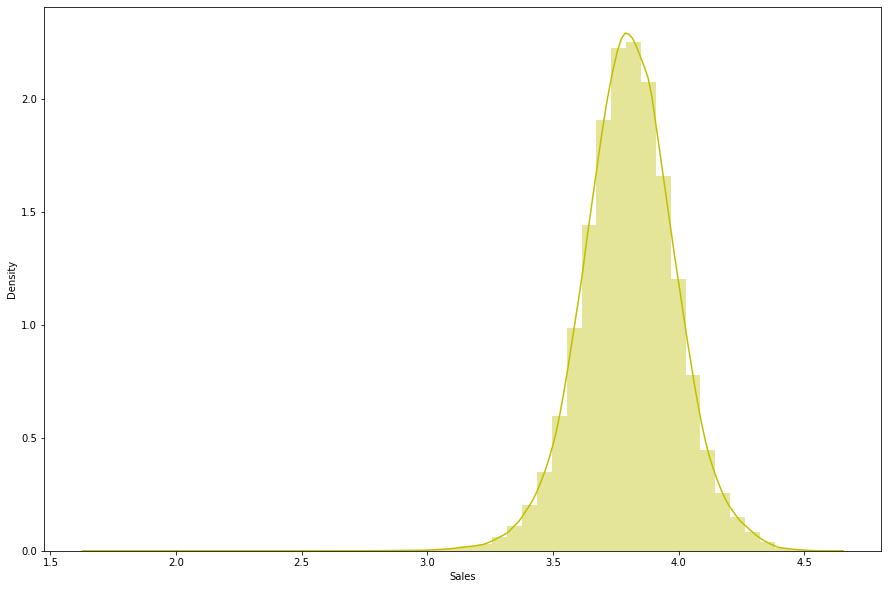

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(np.log10(dh.Sales),color="y")

##### 1. Why did you pick the specific chart?

To understand whether store is running on the day of promotion and how far it affects the sales

##### 2. What is/are the insight(s) found from the chart?

The day when the promotion takes place and if the store is running on that day then the sales have increased drastically 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Creating a logarithmic tranformation will help to train the model in a better way

#### Chart - 11

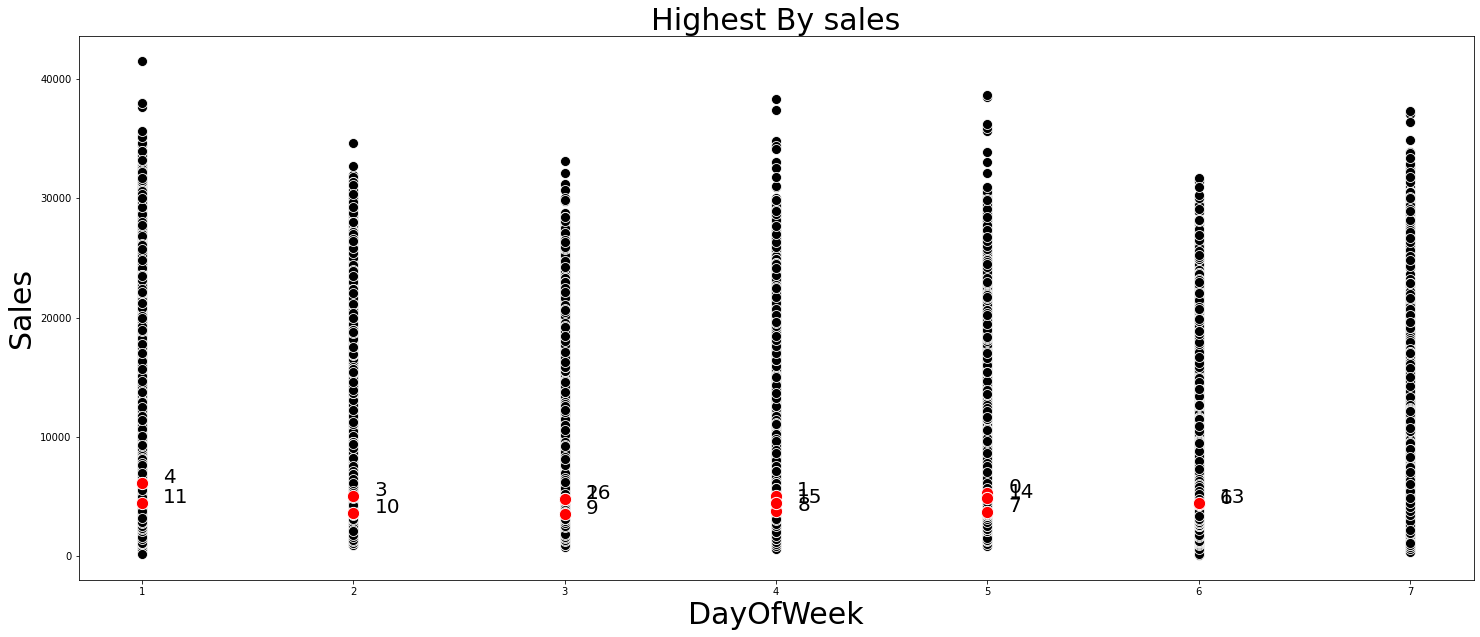

In [ ]:
plt.figure(figsize=(25, 10))
plt.xlabel('DayOfWeek',size=30)
plt.ylabel('Sales',size=30)
plt.title('Highest By sales', size = 30)
sns.scatterplot(x = 'DayOfWeek',y =  'Sales', data = dh, s =100, color = 'black');
sns.scatterplot(x = 'DayOfWeek',y =  'Sales', data = dh.head(15), s =150, color = 'red');
for i in range(dh.head(15).shape[0]):
    plt.annotate(dh.Store.tolist()[i], (dh.DayOfWeek.tolist()[i]+0.1, dh.Sales.tolist()[i] - 1) , size = 20)

##### 1. Why did you pick the specific chart?

To study about the sales variation on different days of week 

##### 2. What is/are the insight(s) found from the chart?

1st and 7th day has the most number of sales i.e weekends

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Makes the visualization more attractive

#### Chart - 12

In [ ]:
# Chart - 12 visualization code
numeric_features = dh.describe().columns
numeric_features

Index(['Store', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday'],
      dtype='object')

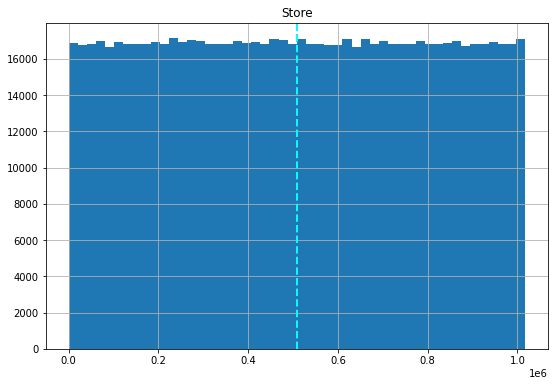

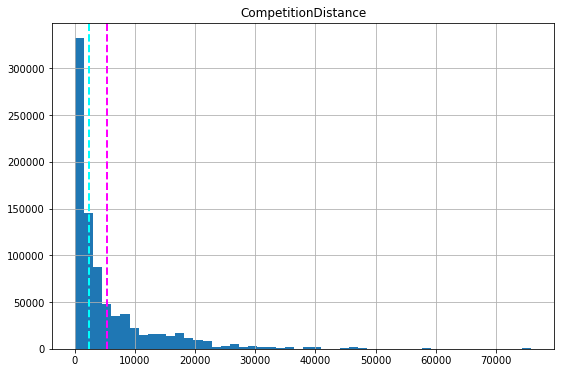

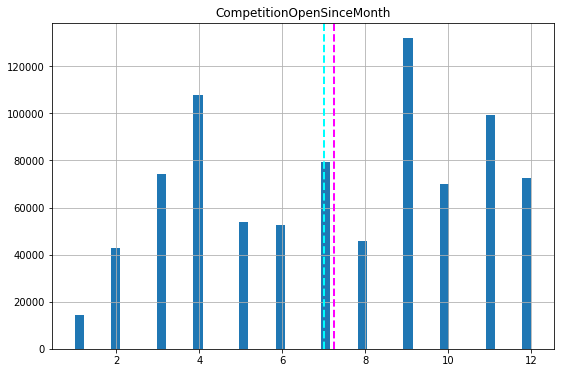

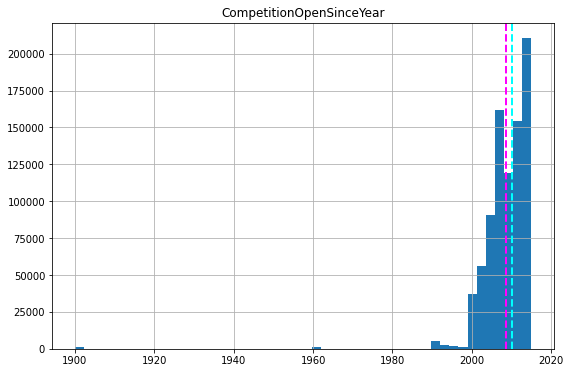

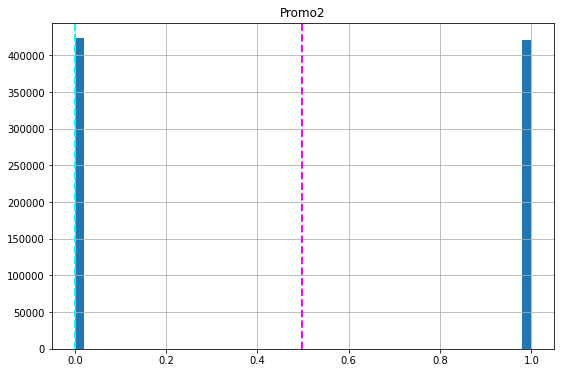

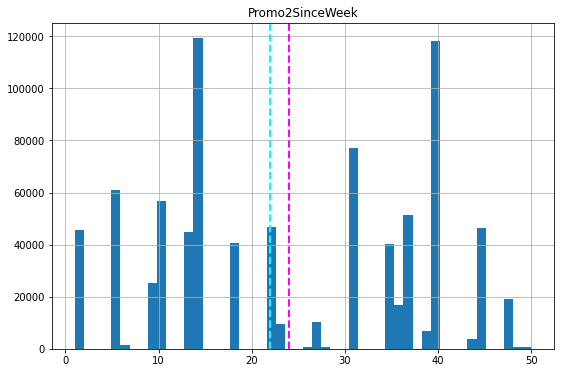

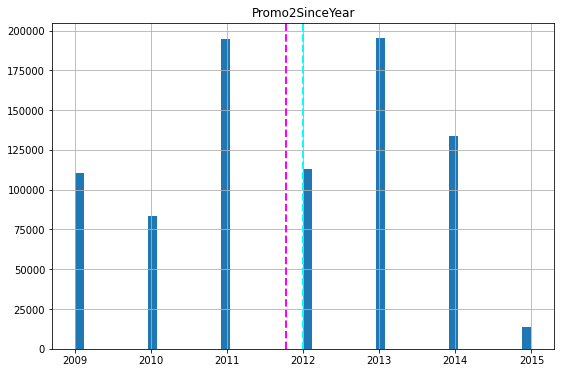

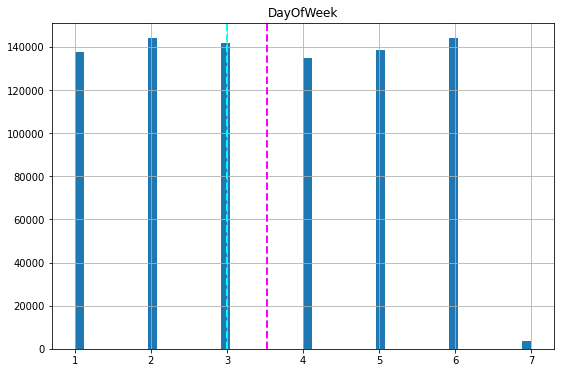

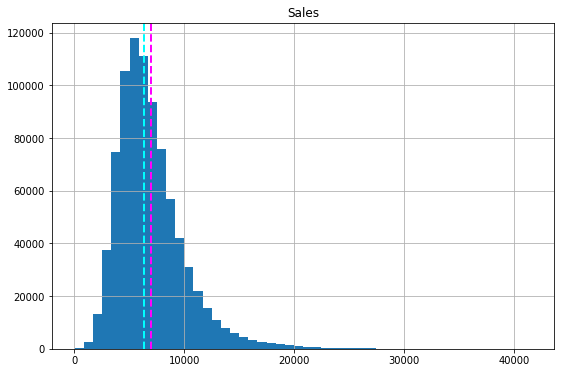

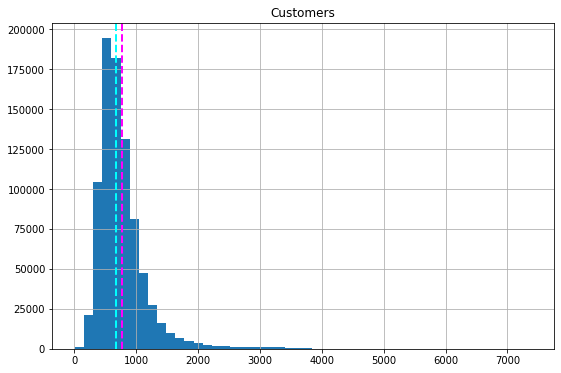

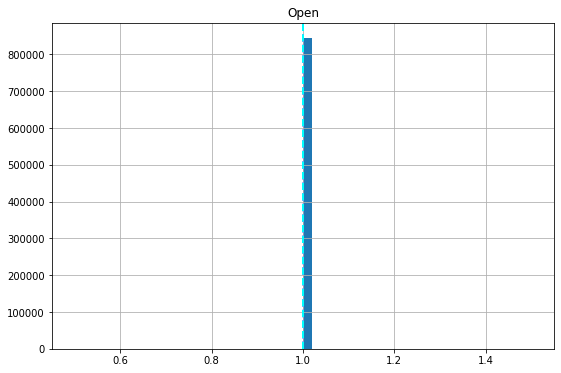

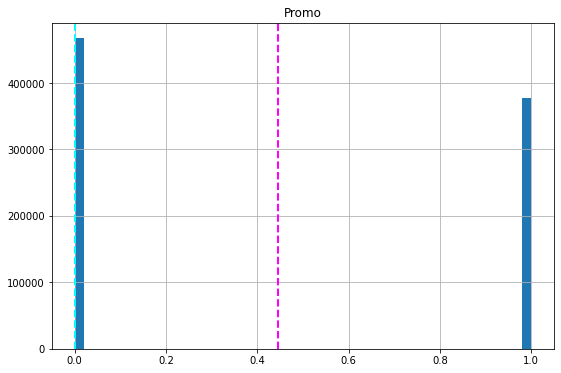

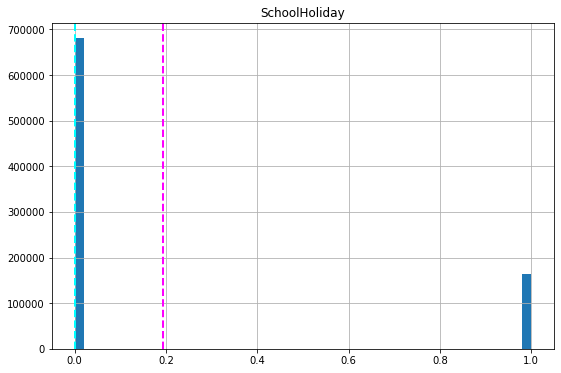

In [ ]:
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dh[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [ ]:
dh.describe()

,index,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,8.443380e+05,8.443380e+05,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.0,844338.000000,844338.000000
mean,5.085964e+05,5.085964e+05,5448.697370,7.234223,2008.589258,0.498670,23.986603,2011.774834,3.520350,6955.959134,762.777166,1.0,0.446356,0.193578
std,2.934813e+05,2.934813e+05,7802.203119,3.185189,6.618278,0.499999,14.113623,1.663100,1.723712,3103.815515,401.194153,0.0,0.497114,0.395102
min,0.000000e+00,0.000000e+00,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,1.000000,46.000000,8.000000,1.0,0.000000,0.000000
25%,2.545202e+05,2.545202e+05,710.000000,4.000000,2006.000000,0.000000,13.000000,2011.000000,2.000000,4859.000000,519.000000,1.0,0.000000,0.000000
50%,5.082545e+05,5.082545e+05,2320.000000,7.000000,2010.000000,0.000000,22.000000,2012.000000,3.000000,6369.000000,676.000000,1.0,0.000000,0.000000
75%,7.626788e+05,7.626788e+05,6880.000000,10.000000,2012.000000,1.000000,37.000000,2013.000000,5.000000,8360.000000,893.000000,1.0,1.000000,0.000000
max,1.017207e+06,1.017207e+06,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000,7.000000,41551.000000,7388.000000,1.0,1.000000,1.000000


##### 1. Why did you pick the specific chart?

To get the overall distribution of mean and median over the various features

##### 2. What is/are the insight(s) found from the chart?

Not much insights found , made visualization easier

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes it may make the visyalization easier to define the mean and median

#### Chart - 13

In [13]:
df8 = dh.reindex(columns = [col for col in dh.columns if col != 'Sales'] + ['Sales'])
df8

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales
0,0,c,a,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",5,2015-07-31,555,1,1,0,1,5263
1,1,c,a,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",4,2015-07-30,546,1,1,0,1,5020
2,2,c,a,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",3,2015-07-29,523,1,1,0,1,4782
3,3,c,a,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",2,2015-07-28,560,1,1,0,1,5011
4,4,c,a,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",1,2015-07-27,612,1,1,0,1,6102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017202,1017202,d,c,5350.0,4.0,2006.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,2013-01-07,471,1,1,0,1,6905
1017204,1017204,d,c,5350.0,4.0,2006.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-05,339,1,0,0,1,4771
1017205,1017205,d,c,5350.0,4.0,2006.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,2013-01-04,326,1,0,0,1,4540
1017206,1017206,d,c,5350.0,4.0,2006.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-03,300,1,0,0,1,4297


In [14]:
df8.drop(columns=['Store'],axis=1,inplace=True)

In [15]:
df8.reset_index(inplace = True)

In [ ]:
df8

In [16]:
df8.rename(columns = {'index':'Store'}, inplace = True)
df8

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales
0,0,c,a,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",5,2015-07-31,555,1,1,0,1,5263
1,1,c,a,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",4,2015-07-30,546,1,1,0,1,5020
2,2,c,a,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",3,2015-07-29,523,1,1,0,1,4782
3,3,c,a,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",2,2015-07-28,560,1,1,0,1,5011
4,4,c,a,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",1,2015-07-27,612,1,1,0,1,6102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,1017202,d,c,5350.0,4.0,2006.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,2013-01-07,471,1,1,0,1,6905
844334,1017204,d,c,5350.0,4.0,2006.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",6,2013-01-05,339,1,0,0,1,4771
844335,1017205,d,c,5350.0,4.0,2006.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",5,2013-01-04,326,1,0,0,1,4540
844336,1017206,d,c,5350.0,4.0,2006.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",4,2013-01-03,300,1,0,0,1,4297


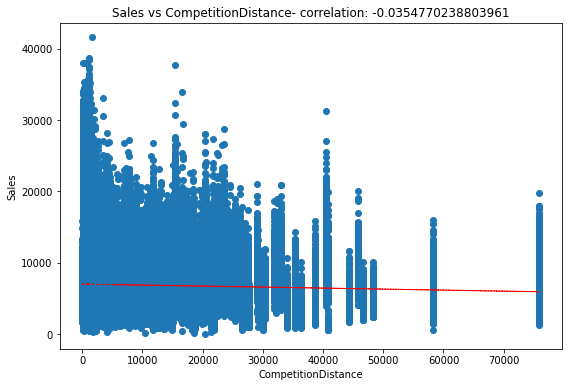

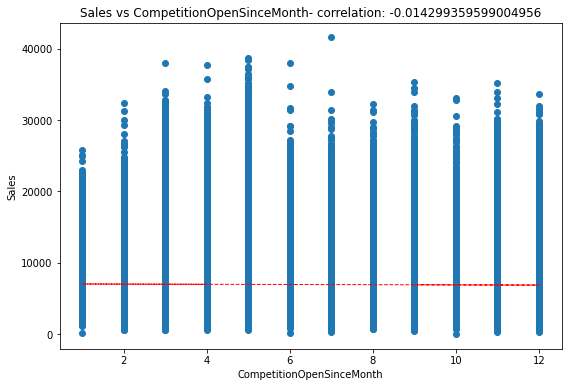

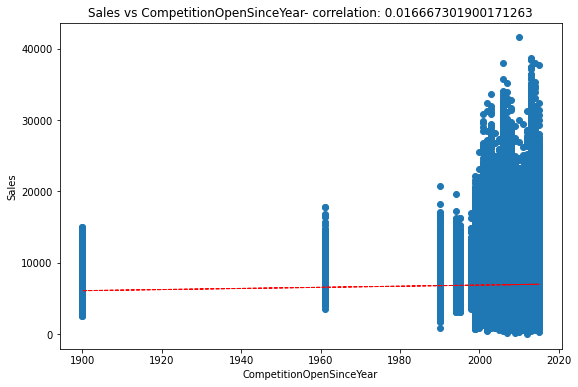

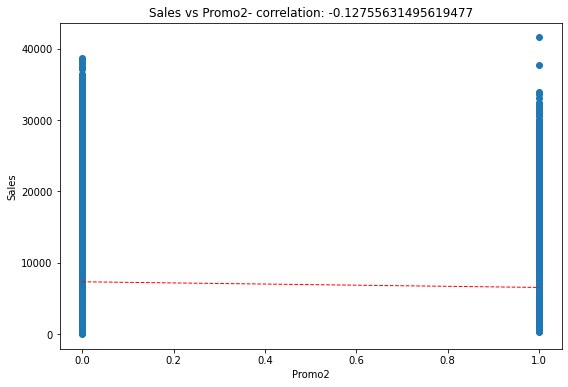

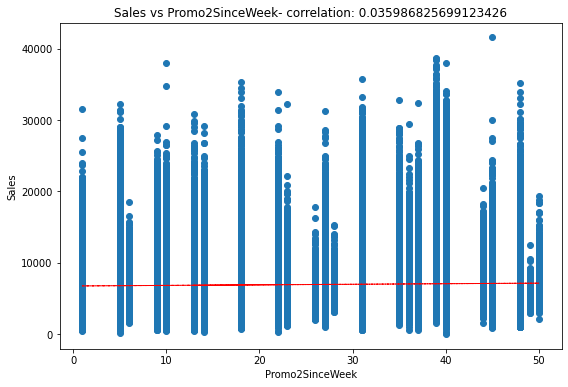

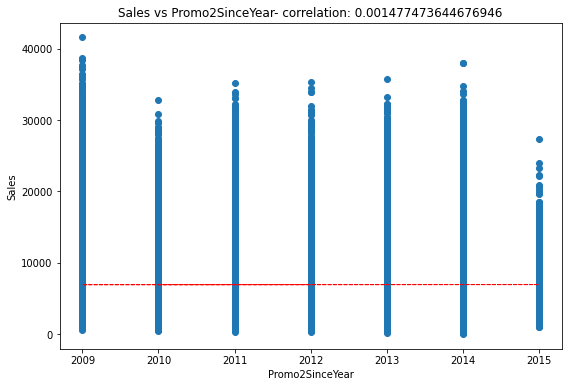

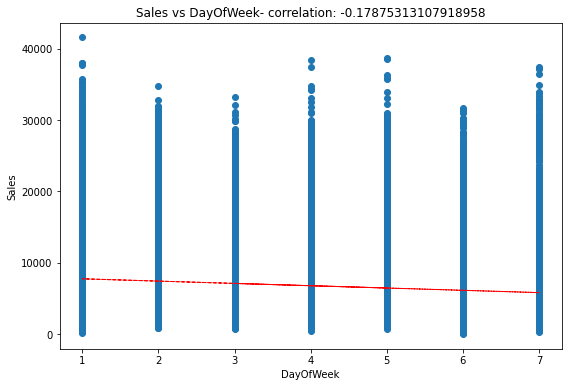

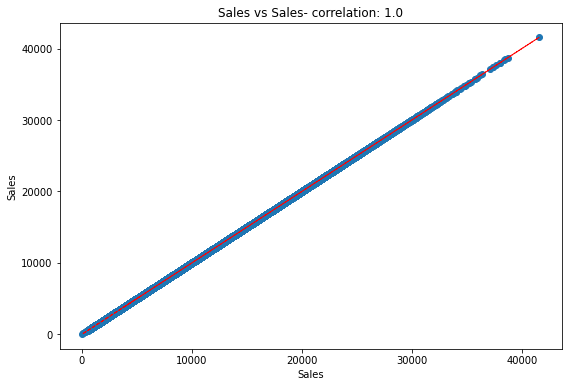

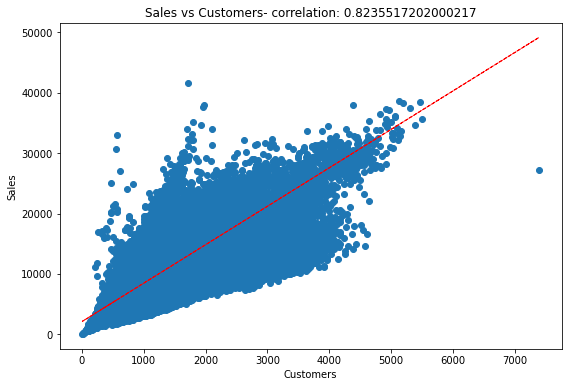

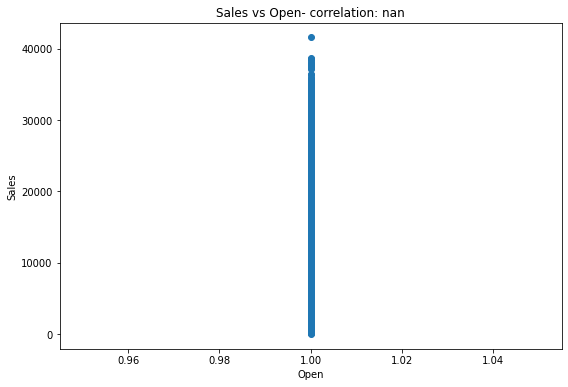

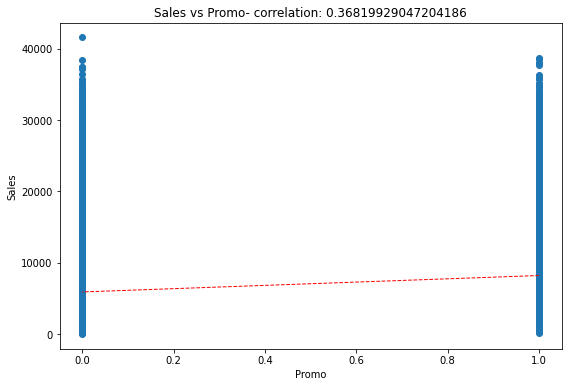

In [ ]:
# Chart - 13 visualization code
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df8[col]
    label = df8['Sales']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Sales')
    ax.set_title('Sales vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df8[col], df8['Sales'], 1)
    y_hat = np.poly1d(z)(df8[col])

    plt.plot(df8[col], y_hat, "r--", lw=1)

plt.show()

In [ ]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017207
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844392 non-null  int64  
 1   StoreType                  844392 non-null  object 
 2   Assortment                 844392 non-null  object 
 3   CompetitionDistance        844392 non-null  float64
 4   CompetitionOpenSinceMonth  844392 non-null  float64
 5   CompetitionOpenSinceYear   844392 non-null  float64
 6   Promo2                     844392 non-null  int64  
 7   Promo2SinceWeek            844392 non-null  float64
 8   Promo2SinceYear            844392 non-null  float64
 9   PromoInterval              844392 non-null  object 
 10  DayOfWeek                  844392 non-null  int64  
 11  Date                       844392 non-null  object 
 12  Customers                  844392 non-null  int64  
 13  Open                       8

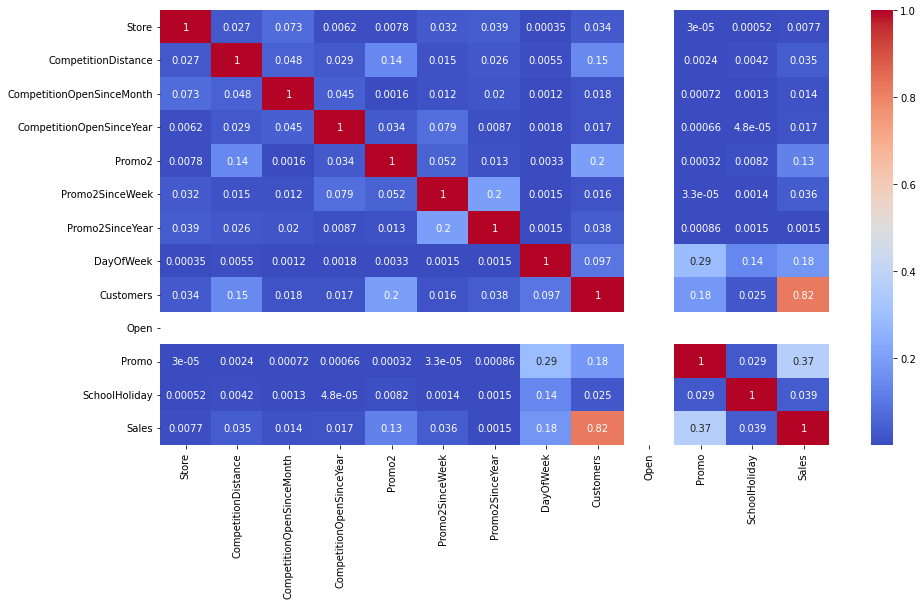

In [ ]:
plt.figure(figsize=(15,8))
correlation = df8.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

To understand the co-relation before converting the categorical features to numeric

##### 2. What is/are the insight(s) found from the chart?

Sales and customers are highly co-related which is good 

#### Chart - 14 - Correlation Heatmap

In [17]:
df8['Store_a'] = np.where(df8['StoreType']=='a', 1, 0)
df8['Store_b'] = np.where(df8['StoreType']=='b', 1, 0)
df8['Store_c'] = np.where(df8['StoreType']=='c', 1, 0)
df8['Store_d'] = np.where(df8['StoreType']=='d',1,0)

df8.drop(columns=['StoreType'],axis=1,inplace=True)

In [ ]:
df8.head()

,Store,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,...,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales,Store_a,Store_b,Store_c,Store_d
0,0,a,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",5,...,555,1,1,0,1,5263,0,0,1,0
1,1,a,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",4,...,546,1,1,0,1,5020,0,0,1,0
2,2,a,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",3,...,523,1,1,0,1,4782,0,0,1,0
3,3,a,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",2,...,560,1,1,0,1,5011,0,0,1,0
4,4,a,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",1,...,612,1,1,0,1,6102,0,0,1,0


In [18]:
df8['Basic'] = np.where(df8['Assortment']=='a', 1, 0)
df8['Extra'] = np.where(df8['Assortment']=='b', 1, 0)
df8['Extended'] = np.where(df8['Assortment']=='c', 1, 0)

df8.drop(columns=['Assortment'],axis=1,inplace=True)

In [ ]:
df8.head()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,...,StateHoliday,SchoolHoliday,Sales,Store_a,Store_b,Store_c,Store_d,Basic,Extra,Extended
0,0,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",5,2015-07-31,...,0,1,5263,0,0,1,0,1,0,0
1,1,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",4,2015-07-30,...,0,1,5020,0,0,1,0,1,0,0
2,2,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",3,2015-07-29,...,0,1,4782,0,0,1,0,1,0,0
3,3,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",2,2015-07-28,...,0,1,5011,0,0,1,0,1,0,0
4,4,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",1,2015-07-27,...,0,1,6102,0,0,1,0,1,0,0


In [19]:
df8['Public_Holiday'] = np.where(df8['StateHoliday']=='a', 1, 0)
df8['Easter_Holiday'] = np.where(df8['StateHoliday']=='b', 1, 0)
df8['Christmas'] = np.where(df8['StateHoliday']=='c', 1, 0)
df8['No_Holiday'] = np.where(df8['StateHoliday']=='0',1,0)

df8.drop(columns=['StateHoliday'],axis=1,inplace=True)

In [ ]:
df8.head()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,...,Store_b,Store_c,Store_d,Basic,Extra,Extended,Public_Holiday,Easter_Holiday,Christmas,No_Holiday
0,0,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",5,2015-07-31,...,0,1,0,1,0,0,0,0,0,1
1,1,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",4,2015-07-30,...,0,1,0,1,0,0,0,0,0,1
2,2,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",3,2015-07-29,...,0,1,0,1,0,0,0,0,0,1
3,3,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",2,2015-07-28,...,0,1,0,1,0,0,0,0,0,1
4,4,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",1,2015-07-27,...,0,1,0,1,0,0,0,0,0,1


In [20]:
df8.drop(columns=['PromoInterval'],axis=1,inplace=True)

In [21]:
df8.drop(columns=['Date'],axis=1,inplace=True)

In [22]:
df9 = df8[(df8 ['Open'] == 1)]
df9

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfWeek,Customers,Open,...,Store_b,Store_c,Store_d,Basic,Extra,Extended,Public_Holiday,Easter_Holiday,Christmas,No_Holiday
0,0,1270.0,9.0,2008.0,0,13.0,2010.0,5,555,1,...,0,1,0,1,0,0,0,0,0,1
1,1,1270.0,9.0,2008.0,0,13.0,2010.0,4,546,1,...,0,1,0,1,0,0,0,0,0,1
2,2,1270.0,9.0,2008.0,0,13.0,2010.0,3,523,1,...,0,1,0,1,0,0,0,0,0,1
3,3,1270.0,9.0,2008.0,0,13.0,2010.0,2,560,1,...,0,1,0,1,0,0,0,0,0,1
4,4,1270.0,9.0,2008.0,0,13.0,2010.0,1,612,1,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,1017202,5350.0,4.0,2006.0,1,22.0,2012.0,1,471,1,...,0,0,1,0,0,1,0,0,0,1
844334,1017204,5350.0,4.0,2006.0,1,22.0,2012.0,6,339,1,...,0,0,1,0,0,1,0,0,0,1
844335,1017205,5350.0,4.0,2006.0,1,22.0,2012.0,5,326,1,...,0,0,1,0,0,1,0,0,0,1
844336,1017206,5350.0,4.0,2006.0,1,22.0,2012.0,4,300,1,...,0,0,1,0,0,1,0,0,0,1


In [ ]:
dependent_variable = 'Sales'

In [ ]:
independent_variable = list(set(df9.columns.tolist()) - {dependent_variable})

In [ ]:
df9[independent_variable].corr()

,Basic,CompetitionOpenSinceYear,SchoolHoliday,Open,Store_b,No_Holiday,Customers,Extended,Promo,CompetitionDistance,...,Public_Holiday,Promo2SinceYear,Promo2,Promo2SinceWeek,Store,Christmas,Store_a,DayOfWeek,Store_d,Extra
Basic,1.000000,-0.017472,0.002973,NaN,-0.031561,0.006163,-0.038868,-0.980665,0.001601,-0.143577,...,-0.006429,-0.011601,-0.007139,0.071907,-0.007874,-0.002434,0.215255,-0.003912,-0.218465,-0.104566
CompetitionOpenSinceYear,-0.017472,1.000000,0.000048,NaN,0.006685,-0.000706,0.016507,0.020354,-0.000662,0.028521,...,0.001536,-0.008706,-0.033628,-0.078564,0.006183,0.000745,0.025583,0.001829,0.000914,-0.014536
SchoolHoliday,0.002973,0.000048,1.000000,NaN,-0.002988,-0.067872,0.024915,-0.002429,0.028971,-0.004241,...,-0.003174,-0.001532,-0.008244,-0.001394,0.000521,0.018717,0.001972,-0.139319,-0.003301,-0.002782
Open,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_b,-0.031561,0.006685,-0.002988,NaN,1.000000,-0.012724,0.430137,-0.110693,-0.017843,-0.076853,...,0.083645,0.015893,-0.057561,-0.025504,-0.001059,0.062126,-0.148848,0.038016,-0.091086,0.723141
No_Holiday,0.006163,-0.000706,-0.067872,NaN,-0.012724,1.000000,0.006950,-0.004405,0.004041,-0.003049,...,-0.072955,0.001358,0.018119,0.009502,-0.001991,-0.023326,-0.001938,0.010223,0.008041,-0.008971
Customers,-0.038868,0.016507,0.024915,NaN,0.430137,0.006950,1.000000,-0.024493,0.182859,-0.147450,...,0.036917,0.037636,-0.202207,0.016378,0.034007,0.018434,0.088394,-0.097266,-0.259187,0.322247
Extended,-0.980665,0.020354,-0.002429,NaN,-0.110693,-0.004405,-0.024493,1.000000,0.000939,0.154398,...,-0.007259,0.007819,0.009735,-0.064013,0.003690,-0.006191,-0.194342,-0.001496,0.231697,-0.092076
Promo,0.001601,-0.000662,0.028971,NaN,-0.017843,0.004041,0.182859,0.000939,1.000000,-0.002390,...,0.006337,-0.000865,-0.000316,-0.000033,-0.000030,-0.008234,0.002423,-0.289268,0.000989,-0.012921
CompetitionDistance,-0.143577,0.028521,-0.004241,NaN,-0.076853,-0.003049,-0.147450,0.154398,-0.002390,1.000000,...,0.010290,-0.025816,-0.141357,-0.015440,-0.027465,-0.003982,-0.031986,0.005540,0.128948,-0.054091


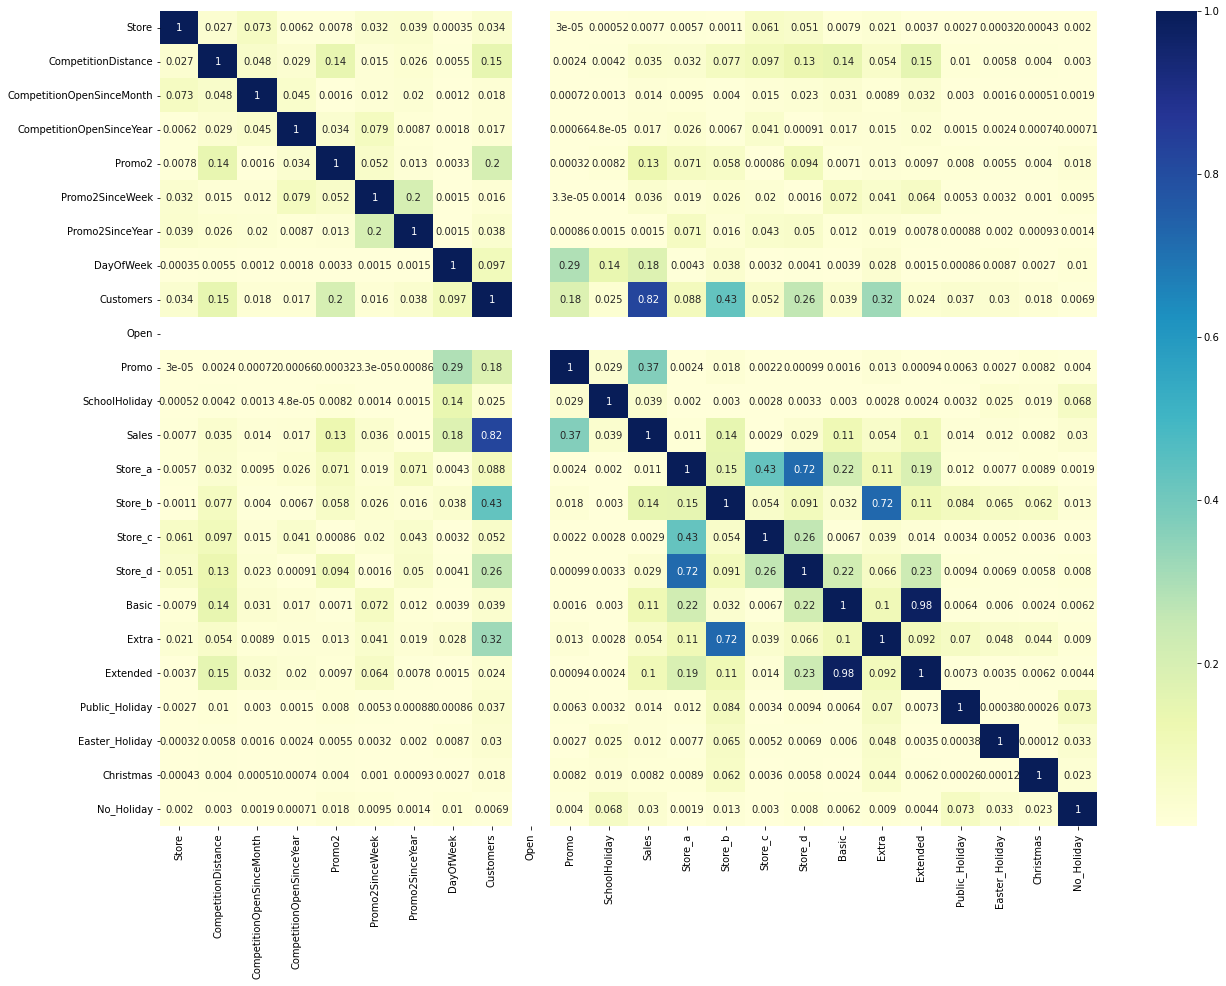

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(21,15))
correlation = df9.corr()
sns.heatmap(abs(correlation), annot=True, cmap='YlGnBu')

In [23]:
### removing multicollear
df9['assortment'] = df9['Basic'] + df9['Extended'] + df9['Extra']
df9.drop(columns=['Basic','Extended','Extra'],axis=1,inplace=True)

##### 1. Why did you pick the specific chart?

To check the co-relation between different dependent and independent variables

##### 2. What is/are the insight(s) found from the chart?

The assortment types are highly co-related and hence we can remove the multicollinear variables.

#### Chart - 15 - Pair Plot 

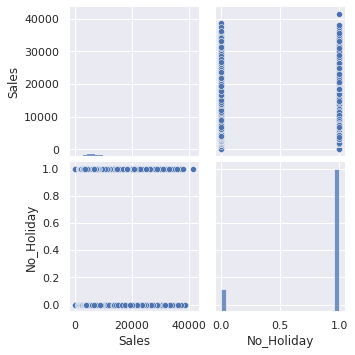

In [ ]:
# Pair Plot visualization code
sns.pairplot(df9,vars = ["Sales","No_Holiday"],  palette="husl")

##### 1. Why did you pick the specific chart?

Pair plots, also known as scatterplot matrices, are used to visualize the relationship between multiple variables in a dataset. They can be useful for identifying patterns and correlations in the data, as well as for identifying outliers

##### 2. What is/are the insight(s) found from the chart?

The variables are not much related 

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Ho => Sales increases as customers decreases 

Ha => Sales increases as the number of customers increases

#### 2. Perform an appropriate statistical test.

In [ ]:
X1 = df10[independent_var].values
y1 = df10[dependent_var].values

In [ ]:
import statsmodels.api as sm

# fit the model
model = sm.OLS(y1, X1).fit()

# obtain the hypothesis testing results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                 2.128e+05
Date:                Thu, 12 Jan 2023   Prob (F-statistic):               0.00
Time:                        16:33:59   Log-Likelihood:            -7.1218e+06
No. Observations:              844338   AIC:                         1.424e+07
Df Residuals:                  844319   BIC:                         1.424e+07
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           130.1370      3.583     36.317      0.0

In [24]:
sales_mean = df8["Sales"].mean()
cust_mean = df8["Customers"].mean()
sales = df8["Sales"]
cust =df8["Customers"]

In [25]:
from scipy.stats import ttest_ind
import numpy as np
print("sales mean value:",sales_mean)
print("cust mean value:",cust_mean)
sales_std = np.std(sales)
cust_std = np.std(cust)
print("sales std value:",sales_std)
print("cust std value:",cust_std)
ttest,pval = ttest_ind(sales,cust)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

sales mean value: 6955.959133664481
cust mean value: 762.777166253325
sales std value: 3103.813677472826
cust std value: 401.1939149876185
p-value 0.0
we reject null hypothesis


##### Which statistical test have you done to obtain P-Value?

I have used Two-sampled T test to obtain p-value

##### Why did you choose the specific statistical test?

Because it gives the exact co-relation and p value for the dependent and independent variable

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Ho = Sales prices does not change when the stores are opened on the day of promotion

Ha = Sales prices increases when the stores are open on the day of promotion

#### 2. Perform an appropriate statistical test.

In [38]:
sales_mean = df10["Sales"].mean()
promo_mean = df10["Promo"].mean()
sales = df10["Sales"]
promo =df10["Promo"]

In [42]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind
import numpy as np
print("sales mean value:",sales_mean)
print("promo mean value:",promo_mean)
sales_std = np.std(sales)
promo_std = np.std(promo)
print("sales std value:",sales_std)
print("promo std value:",promo_std)
ttest,pval = ttest_ind(sales,promo)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

sales mean value: 6800.694474250833
promo mean value: 0.4463556064040704
sales std value: 2621.624146947585
promo std value: 0.49711394974967754
p-value 0.0
we reject null hypothesis


##### Which statistical test have you done to obtain P-Value?

I have used Two-sampled T test to obtain p-value

##### Why did you choose the specific statistical test?

Because it gives the exact co-relation and p value for the dependent and independent variable

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Ho - Sales increases when stores do not promote

Ha - Sales increases when the stores promote

#### 2. Perform an appropriate statistical test.

In [43]:
sales_mean = df10["Sales"].mean()
promo2_mean = df10["Promo2"].mean()
sales = df10["Sales"]
promo2 =df10["Promo2"]

In [44]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind
import numpy as np
print("sales mean value:",sales_mean)
print("promo2 mean value:",promo2_mean)
sales_std = np.std(sales)
promo2_std = np.std(promo2)
print("sales std value:",sales_std)
print("promo2 std value:",promo2_std)
ttest,pval = ttest_ind(sales,promo2)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

sales mean value: 6800.694474250833
promo2 mean value: 0.49866996392439994
sales std value: 2621.624146947585
promo2 std value: 0.4999982310009084
p-value 0.0
we reject null hypothesis


##### Which statistical test have you done to obtain P-Value?

I have used Two-sampled T test to obtain p-value

##### Why did you choose the specific statistical test?

Because it gives the exact co-relation and p value for the dependent and independent variable

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [49]:
# All missing values are handled above 
df10.isnull().sum()

Store                        0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
DayOfWeek                    0
Customers                    0
Open                         0
Promo                        0
SchoolHoliday                0
Sales                        0
Store_a                      0
Store_b                      0
Store_c                      0
Store_d                      0
Public_Holiday               0
Easter_Holiday               0
Christmas                    0
No_Holiday                   0
assortment                   0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

For some values the mean or mode couldn't be used so we have filled the null values by considering the rows above and below the rows with null values 

### 2. Handling Outliers

Store                           AxesSubplot(0.125,0.826831;0.352273x0.053169)
CompetitionDistance          AxesSubplot(0.547727,0.826831;0.352273x0.053169)
CompetitionOpenSinceMonth       AxesSubplot(0.125,0.763028;0.352273x0.053169)
CompetitionOpenSinceYear     AxesSubplot(0.547727,0.763028;0.352273x0.053169)
Promo2                          AxesSubplot(0.125,0.699225;0.352273x0.053169)
Promo2SinceWeek              AxesSubplot(0.547727,0.699225;0.352273x0.053169)
Promo2SinceYear                 AxesSubplot(0.125,0.635423;0.352273x0.053169)
DayOfWeek                    AxesSubplot(0.547727,0.635423;0.352273x0.053169)
Customers                        AxesSubplot(0.125,0.57162;0.352273x0.053169)
Open                          AxesSubplot(0.547727,0.57162;0.352273x0.053169)
Promo                           AxesSubplot(0.125,0.507817;0.352273x0.053169)
SchoolHoliday                AxesSubplot(0.547727,0.507817;0.352273x0.053169)
Sales                           AxesSubplot(0.125,0.444014;0.352

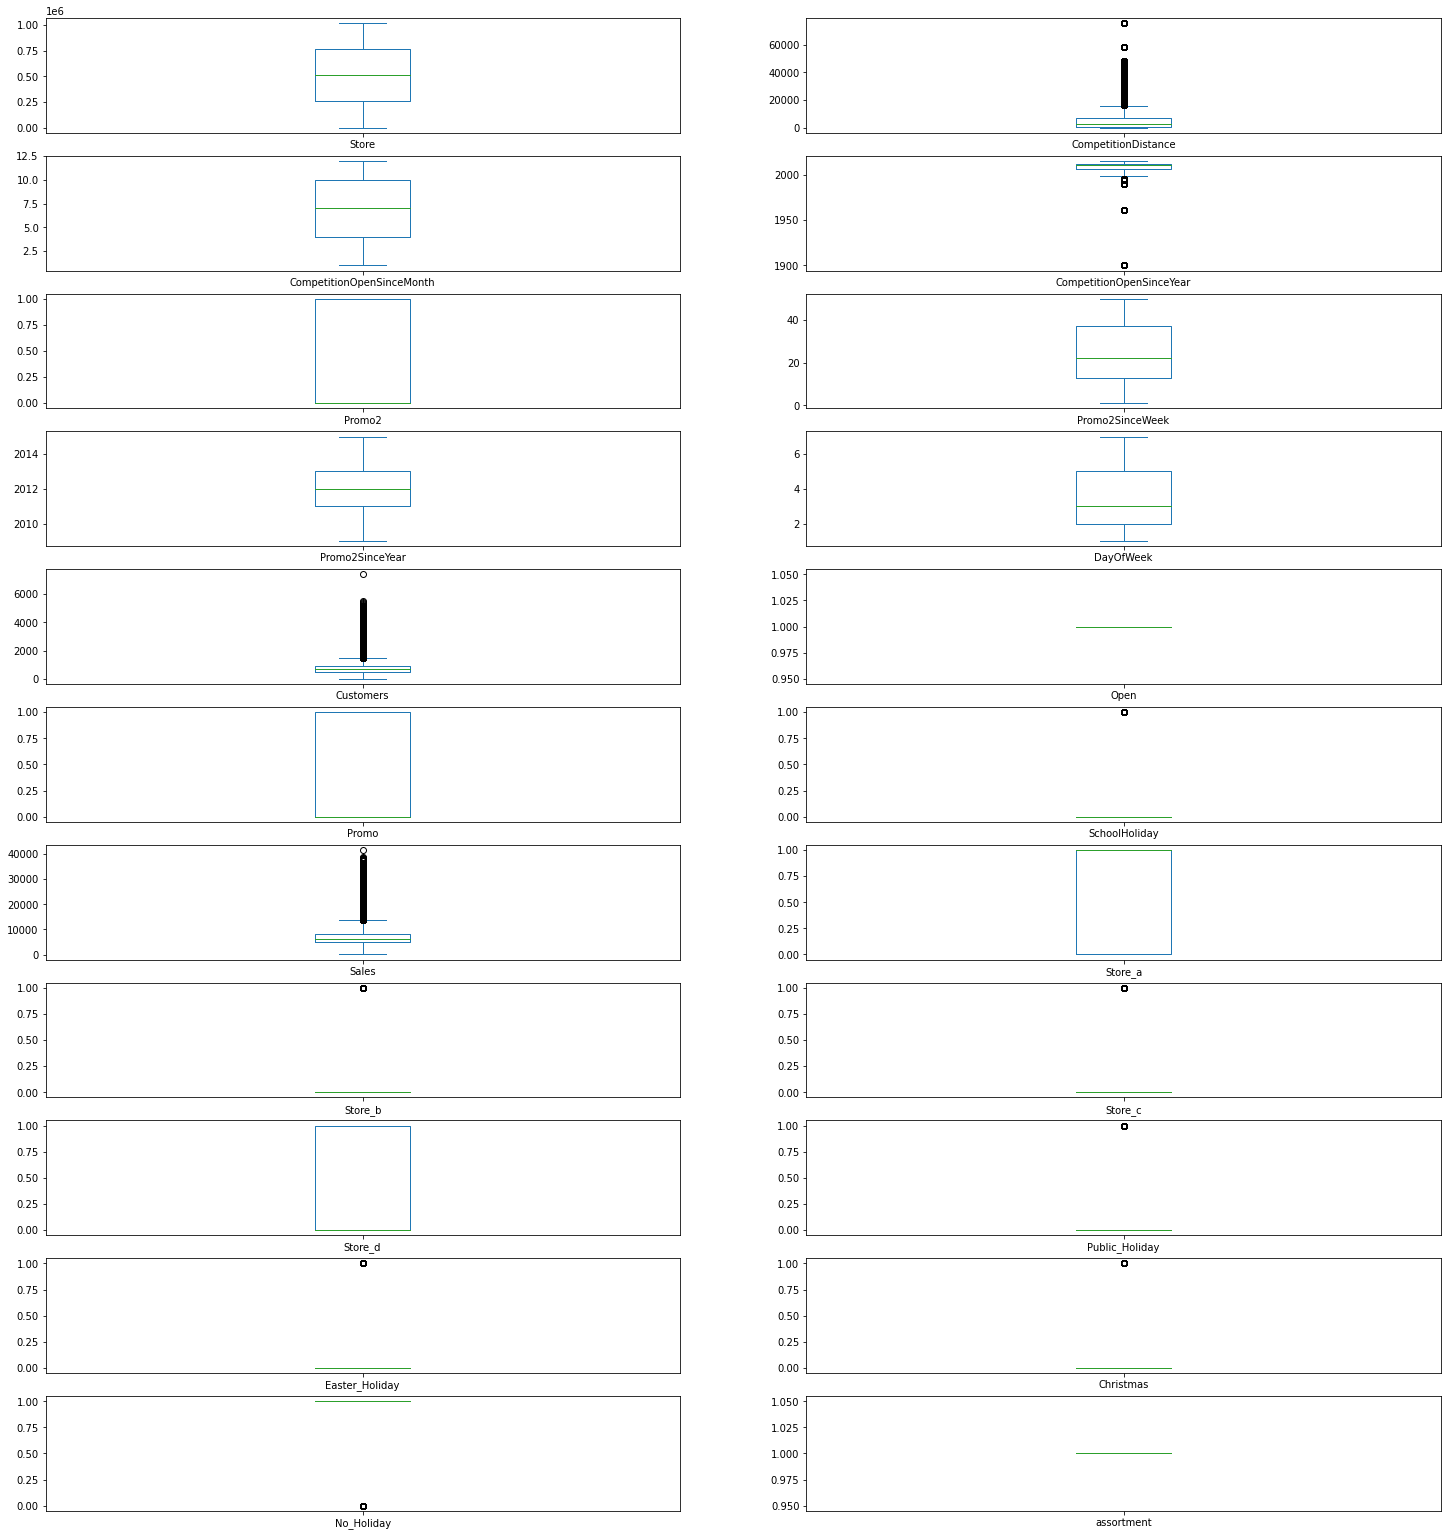

In [ ]:
# Handling Outliers & Outlier treatments
df9.plot(kind="box",subplots=True,layout=(12,2),figsize=(25,30))

Previous Shape With Outlier:  (844338, 22)
Shape After Removing Outliers: (844338, 22)


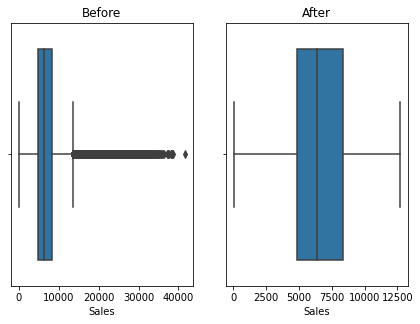

In [28]:
#Using Quantile Method
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
print("Previous Shape With Outlier: ",df9.shape)
sns.boxplot(df9['Sales'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")

########### HANDLING OUTLIER ######
max_val = df9.Sales.quantile(0.95)
min_val = df9.Sales.quantile(0.05)

df10 = df9
df10['Sales'] = np.where(df10['Sales']>max_val,max_val,df10['Sales'])

print("Shape After Removing Outliers:", df10.shape)

sns.boxplot(df10['Sales'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

Previous Shape With Outlier:  (844338, 22)
Shape After Removing Outliers: (844338, 22)


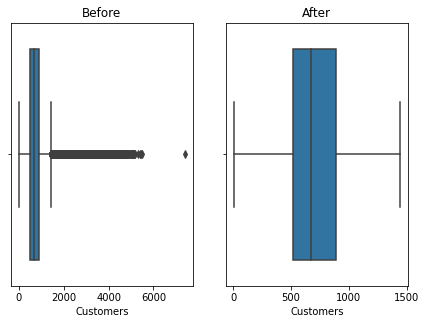

In [29]:
#Using Quantile Method
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
print("Previous Shape With Outlier: ",df9.shape)
sns.boxplot(df9['Customers'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")

########### HANDLING OUTLIER ######
max_val = df9.Customers.quantile(0.95)
min_val = df9.Customers.quantile(0.05)

df10 = df9
df10['Customers'] = np.where(df10['Customers']>max_val,max_val,df10['Customers'])

print("Shape After Removing Outliers:", df10.shape)

sns.boxplot(df10['Customers'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

Previous Shape With Outlier:  (844338, 22)
Shape After Removing Outliers: (844338, 22)


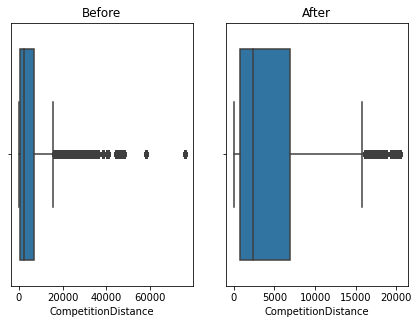

In [30]:
#Using Quantile Method
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
print("Previous Shape With Outlier: ",df9.shape)
sns.boxplot(df9['CompetitionDistance'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")

########### HANDLING OUTLIER ######
max_val = df9.CompetitionDistance.quantile(0.95)
min_val = df9.CompetitionDistance.quantile(0.05)

df10 = df9
df10['CompetitionDistance'] = np.where(df10['CompetitionDistance']>max_val,max_val,df10['CompetitionDistance'])

print("Shape After Removing Outliers:", df10.shape)

sns.boxplot(df10['CompetitionDistance'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

Previous Shape With Outlier:  (844338, 22)
710.0 6880.0
6170.0
-8545.0 16135.0
Shape After Removing Outliers: (844338, 22)


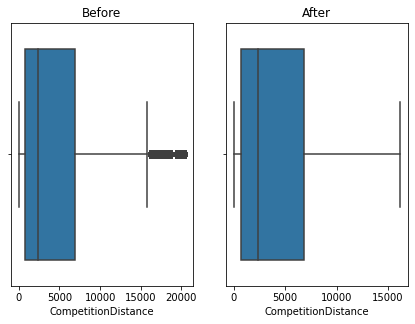

In [31]:
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
print("Previous Shape With Outlier: ",df9.shape)
sns.boxplot(df9['CompetitionDistance'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")

########### HANDLING OUTLIER ######
Q1 = df9.CompetitionDistance.quantile(0.25)
Q3 = df9.CompetitionDistance.quantile(0.75)
print(Q1,Q3)

IQR = Q3-Q1
print(IQR)

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(lower_limit,upper_limit)


df10 = df9
df10['CompetitionDistance'] = np.where(df10['CompetitionDistance']>upper_limit,upper_limit,df10['CompetitionDistance'])
df10['CompetitionDistance'] = np.where(df10['CompetitionDistance']<lower_limit,lower_limit,df10['CompetitionDistance'])

print("Shape After Removing Outliers:", df10.shape)

sns.boxplot(df10['CompetitionDistance'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

By using the Quantile method I have removed the outliers. Using this method makes it easier to visualize the outliers and remove them accordingly

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
categorical_features = df8.describe(include=['object','category']).columns

TypeError: ignored

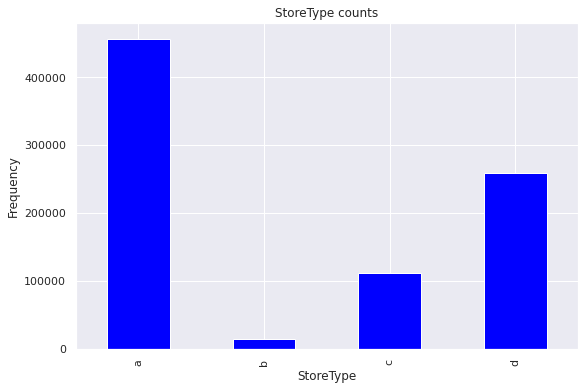

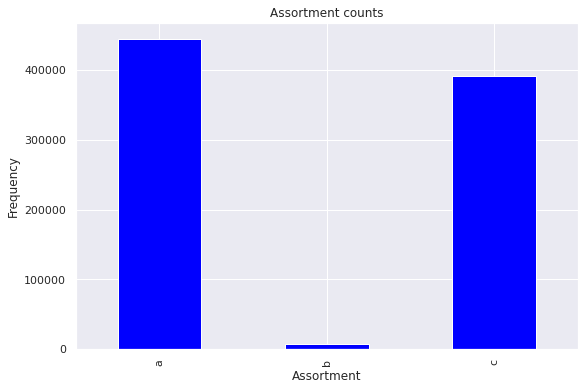

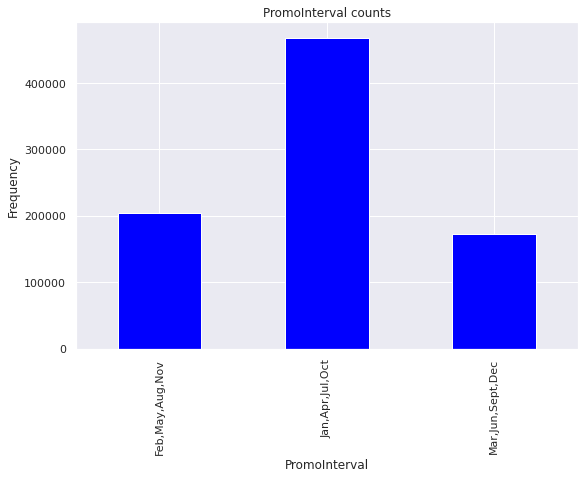

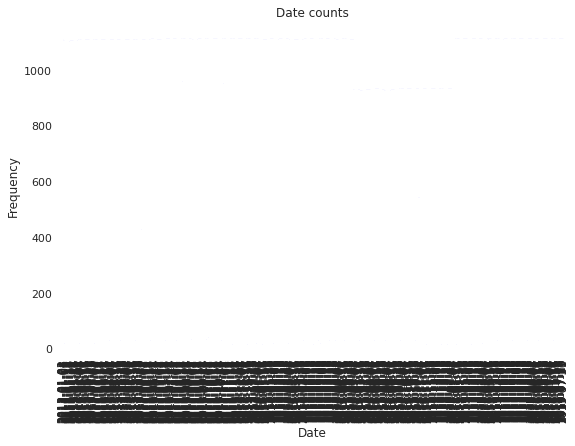

In [ ]:
for col in categorical_features:
    counts = df8[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='blue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

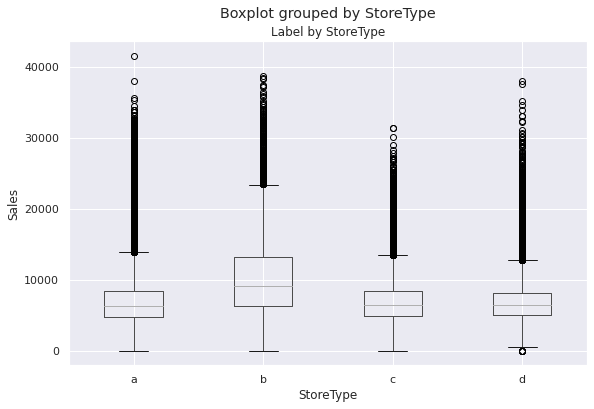

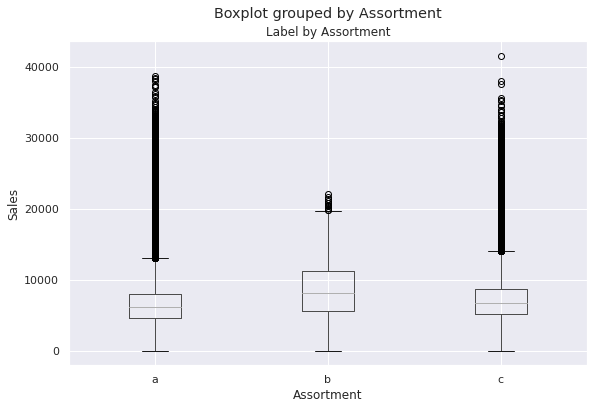

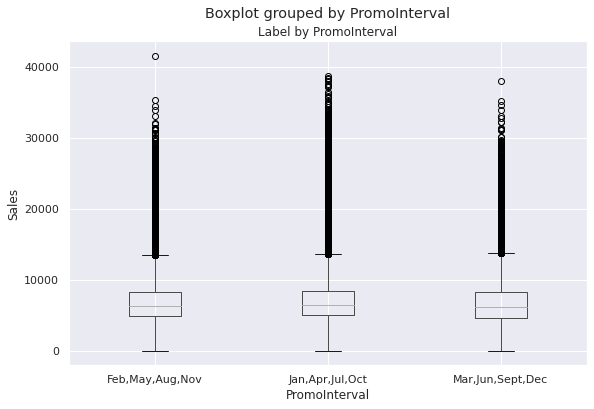

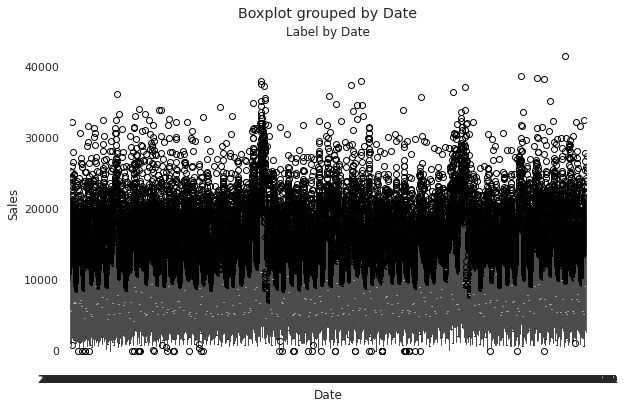

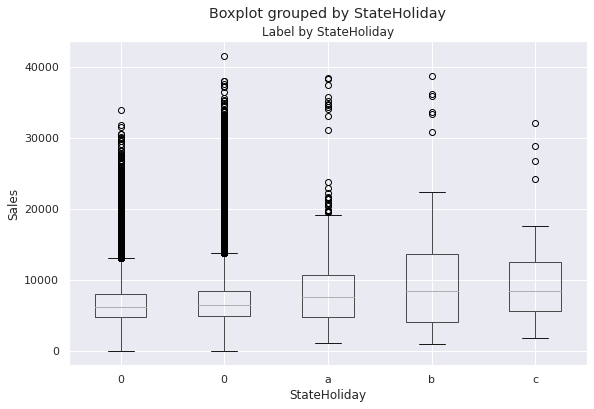

In [ ]:
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df8.boxplot(column = 'Sales', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Sales")
plt.show()

#### What all categorical encoding techniques have you used & why did you use those techniques?

I have simply counted the categorical features for each column and also used box plot to analyze the outliers in each feature.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
numeric_features_1 = df10.describe().columns
numeric_features_1

Index(['Store', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'DayOfWeek', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'Sales', 'Store_a', 'Store_b', 'Store_c', 'Store_d',
       'Public_Holiday', 'Easter_Holiday', 'Christmas', 'No_Holiday',
       'assortment'],
      dtype='object')

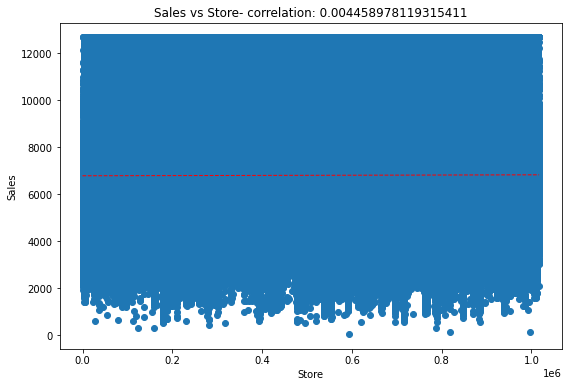

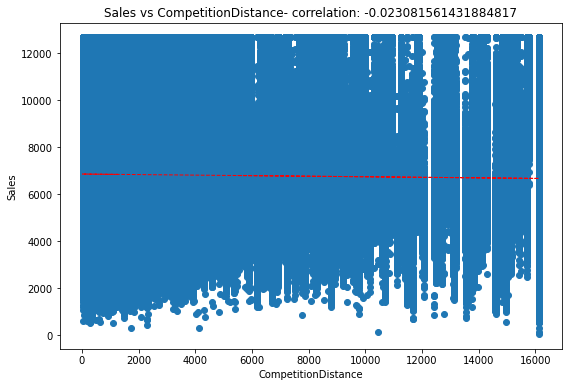

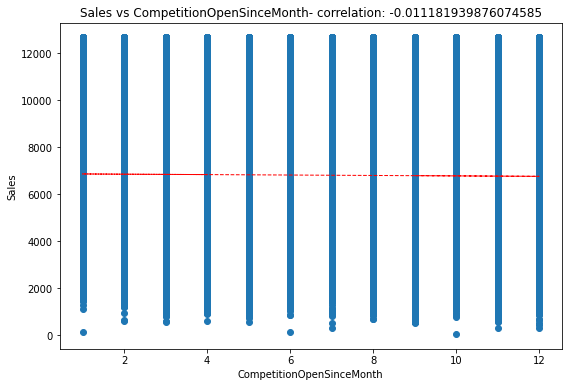

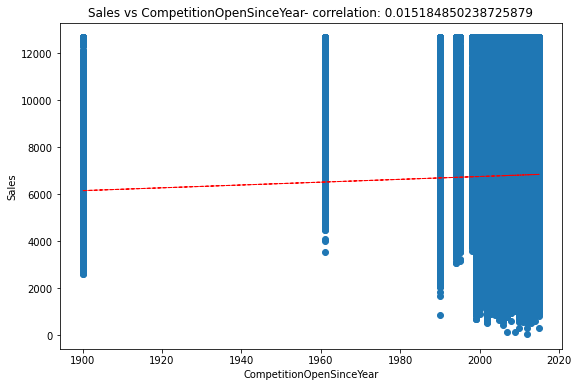

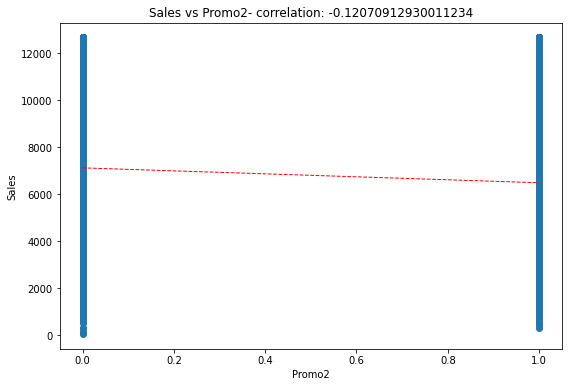

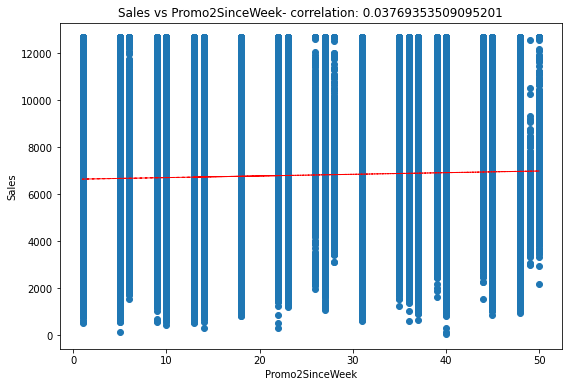

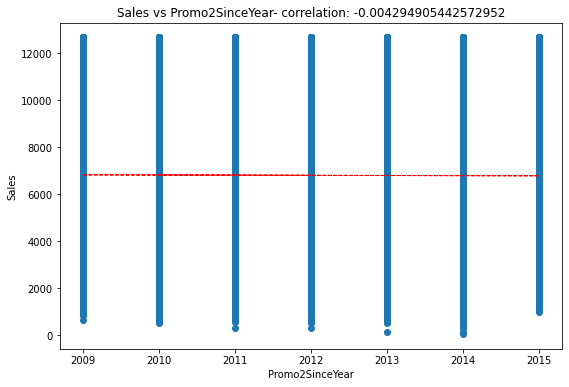

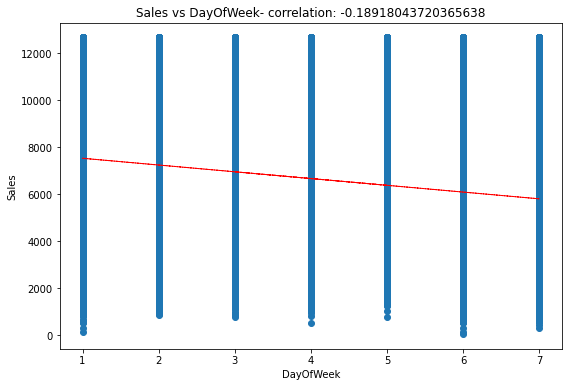

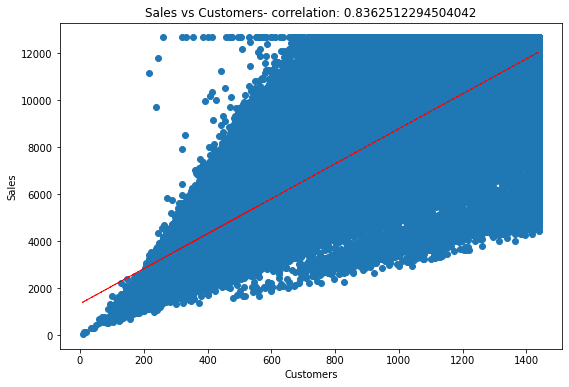

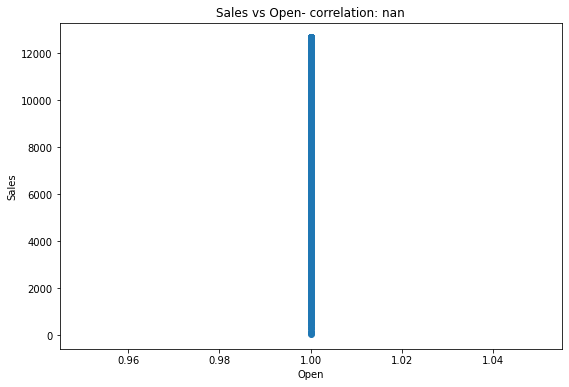

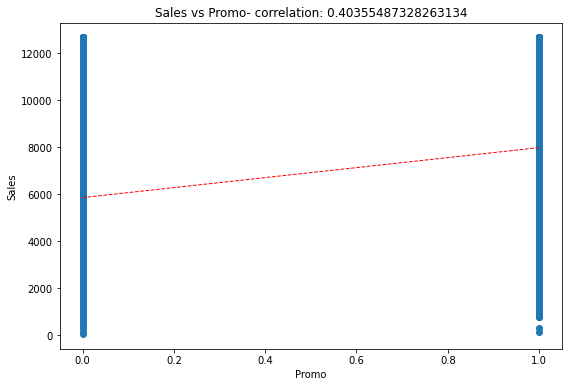

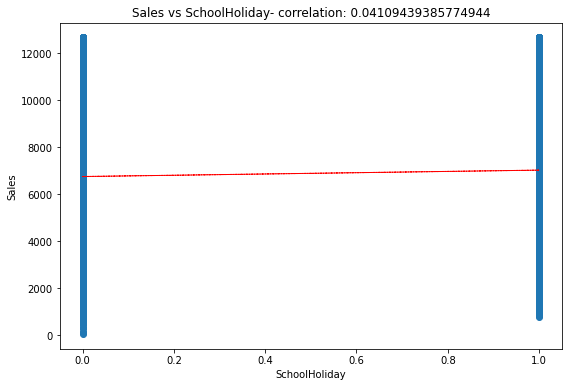

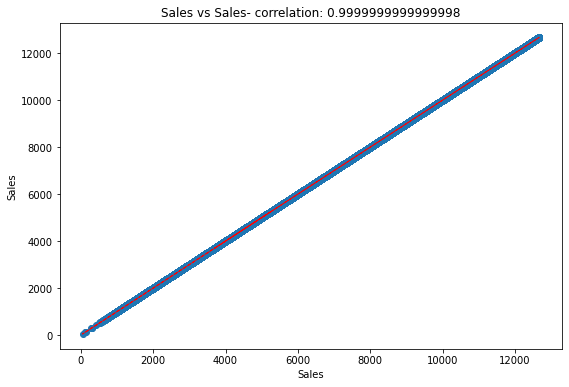

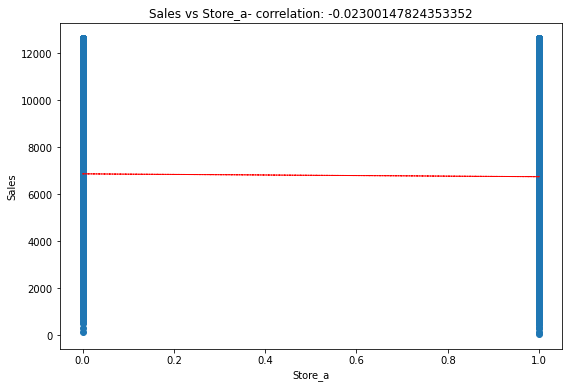

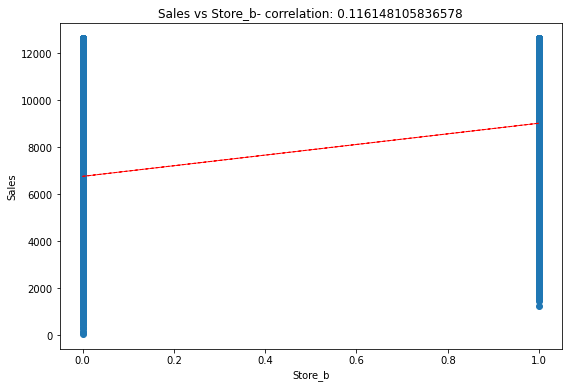

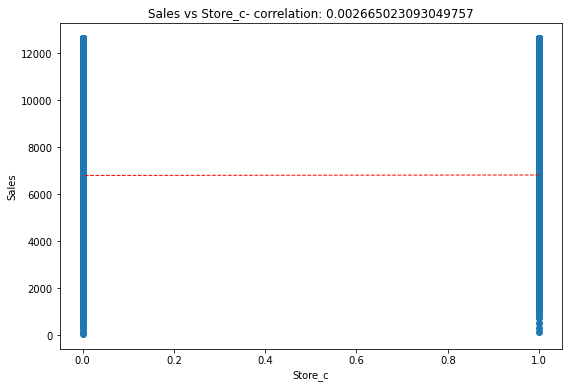

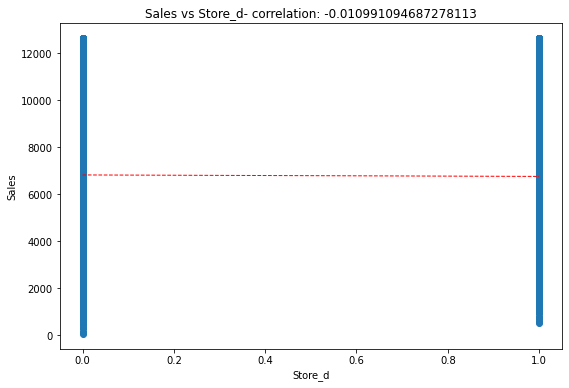

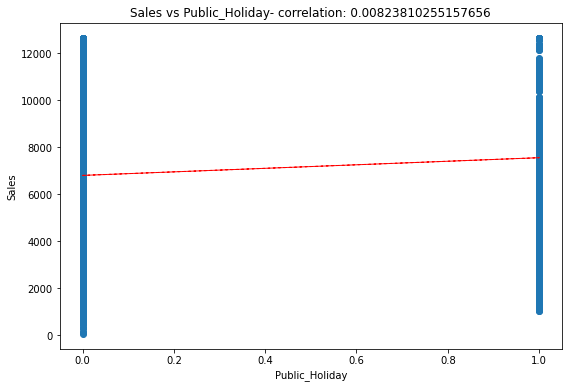

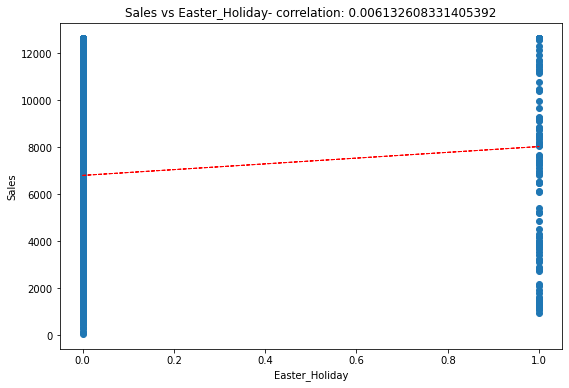

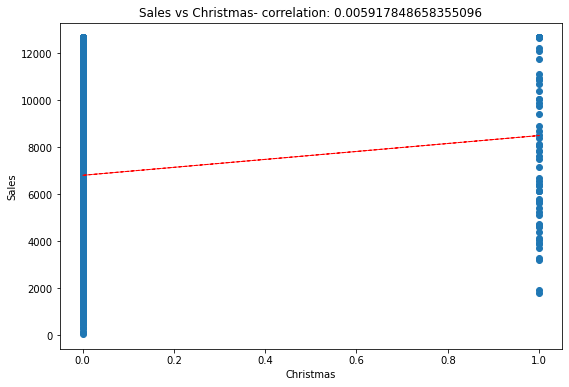

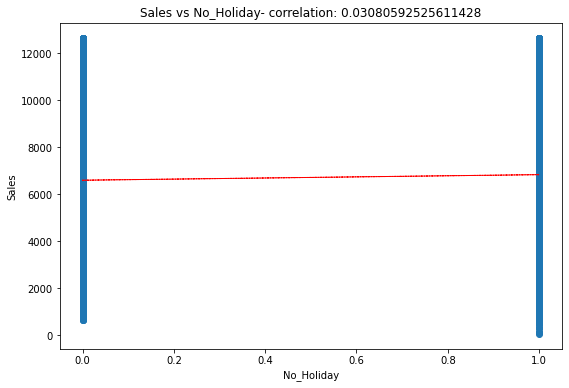

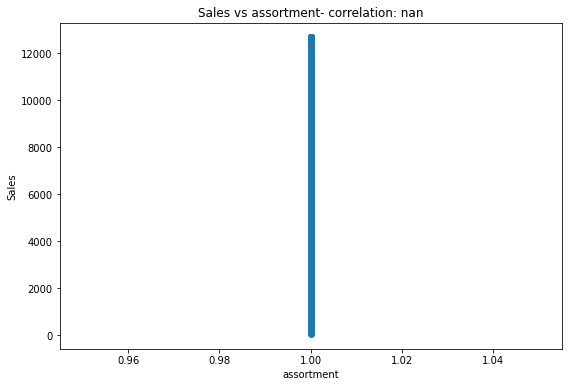

In [ ]:
for col in numeric_features_1:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df10[col]
    label = df10['Sales']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Sales')
    ax.set_title('Sales vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df10[col], df10['Sales'], 1)
    y_hat = np.poly1d(z)(df10[col])

    plt.plot(df10[col], y_hat, "r--", lw=1)

plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

#### 2. Feature Selection

In [ ]:
calc_vif(df10[[i for i in df10.describe().columns if i not in ['Store','Sales','Store_d','Store_a','Open','assortment','CompetitionOpenSinceYear','Promo2SinceYear']]])

,variables,VIF
0,CompetitionDistance,1.768368
1,CompetitionOpenSinceMonth,5.163371
2,Promo2,1.933845
3,Promo2SinceWeek,3.551941
4,DayOfWeek,4.584735
5,Customers,6.709586
6,Promo,2.045056
7,SchoolHoliday,1.240959
8,Store_b,1.130508
9,Store_c,1.183862


In [ ]:
numerical_features = ['Promo2SinceWeek','Promo','SchoolHoliday','Store_b','Store_c','Customers','CompetitionOpenSinceMonth','Christmas','Easter_Holiday','Public_Holiday','CompetitionDistance','No_Holiday','Promo2']
numerical_features

['Promo2SinceWeek',
 'Promo',
 'SchoolHoliday',
 'Store_b',
 'Store_c',
 'Customers',
 'CompetitionOpenSinceMonth',
 'Christmas',
 'Easter_Holiday',
 'Public_Holiday',
 'CompetitionDistance',
 'No_Holiday',
 'Promo2']

##### What all feature selection methods have you used  and why?

Variance Inflation Factor is used to remove the multicollinearity between the highly co-related independent variables.

##### Which all features you found important and why?

All the features listed in numerical features are found to be the most important because their VIF value is optimal , although if we inlcude all the feaatures then also the VIF value is not much deviated, so we can also consider all the independent variables.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
########################### NO ###################

### 6. Data Scaling

In [35]:
st_x= StandardScaler()  
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)    

##### Which method have you used to scale you data and why?

I have used StandardScaler to scale the data. It is one of the most common ways of scaling data, it use the z-score formula which makes the data normally distributed with mean = 0 and std = 1.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)
##################################### NO ###################################

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [32]:
dependent_var = 'Sales'
independent_var = list(set(df10.columns.tolist()) - {dependent_var})

In [33]:
X = df10[independent_var].values
#y = df10[dependent_var].values
y = np.log10(df10['Sales'])

In [ ]:
X = df10[numerical_features].values
#y = df10[dependent_var].values
y = np.log10(df10['Sales'])

In [34]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)#11

##### What data splitting ratio have you used and why? 

80% for training and 20% for testing is splitted accordingly. Most common used ratio for splitting the training and testing set. Anythingmore or less can hinder the accuracy of the model.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Data is normally distributed and hence not imbalanced

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
ridge  = Ridge(alpha = 1)

In [ ]:
ridge.fit(X_train,y_train)

Ridge(alpha=1)

In [ ]:
ridge.score(X_train, y_train)

0.7931249812031116

In [ ]:
y_pred_r = ridge.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_r))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_r))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 1647285.4612205743
RMSE : 1283.4661901353593
R2 : 0.7610289031942936
Adjusted R2 :  0.7609991814772679


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
ridge = Ridge()
parameters = {'alpha': [2,2.5,3,3.1,3.3,3.5,3.9,4,4.2,4.5,4.8,5,5.1,5.2,5.3,6,7.2,7.4,7.7,7.9,8.1,8.4,8.5,8.7,8.9,10,10.5,10.7,10.9,11.2,11.4,11.7,11.8,11.9,12,12.1,12.3,12.5,12.7,12.9,13,13.5,13.8,14.3,14.8,15.2]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=10)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [2, 2.5, 3, 3.1, 3.3, 3.5, 3.9, 4, 4.2, 4.5,
                                   4.8, 5, 5.1, 5.2, 5.3, 6, 7.2, 7.4, 7.7, 7.9,
                                   8.1, 8.4, 8.5, 8.7, 8.9, 10, 10.5, 10.7,
                                   10.9, 11.2, ...]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 5}

Using  {'alpha': 5}  the negative mean squared error is:  -0.006365223545911898


In [ ]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 1647264.658575026
RMSE : 1283.4580860219105
R2 : 0.7610319210264423
Adjusted R2 :  0.7610021996847556


In [ ]:
ridge.fit(X_train, y_train)

Ridge()

In [ ]:
predictions = ridge.predict(X_test)

In [ ]:
print("Training accuracy:", ridge.score(X_train, y_train))
print("Testing accuracy:", ridge.score(X_test, y_test))

Training accuracy: 0.7931249812031116
Testing accuracy: 0.7943575200125433


##### Which hyperparameter optimization technique have you used and why?

Grid search - This method involves specifying a set of possible values for each hyper-parameter and training the model for each combination of hyper-parameter values.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is not a much improvement after doing the hyper-parameter tuning. The R2 values remains the same upto 2 decimal places.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

However when compare the training and testing accuracy , we can conclude that the testing accuarcy is slightly more than training and so the model is trained in a good way to estimate the price values

### ML Model - 2

In [ ]:
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(criterion = 'mse', random_state = 15, max_depth = 13, min_samples_leaf = 1) # 15, 17,
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=13, random_state=15)

In [ ]:
y_pred_dr = regressor.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_dr))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_dr))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_dr)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 576291.042479743
RMSE : 759.1383552948323
R2 : 0.916397670141127
Adjusted R2 :  0.9163872722109004


In [ ]:
print("Training accuracy:", regressor.score(X_train, y_train))
print("Testing accuracy:", regressor.score(X_test, y_test))

Training accuracy: 0.9305330821856062
Testing accuracy: 0.9256708801549535


#### 2. Cross- Validation & Hyperparameter Tuning

In [51]:
# We can tune the max-depth parameter and can change the R2 value accordingly

##### Which hyperparameter optimization technique have you used and why?

We can tune the max-depth parameter and can change the R2 value accordingly but increasing more can overfit the model

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Improved model and score is shown above 

### ML Model - 3

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create the random forest regressor
regressor_rf = RandomForestRegressor(n_estimators=100, random_state=0)
# Train the regressor on the training data
regressor_rf.fit(X_train, y_train)
# Make predictions on the test data
y_pred = regressor_rf.predict(X_test)

In [ ]:
score = regressor_rf.score(X_test, y_test)

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 180637.17773884366
RMSE : 425.0143265101115
R2 : 0.9737950309740768
Adjusted R2 :  0.9737917717653923


In [ ]:
print("Training accuracy:", regressor_rf.score(X_train, y_train))
print("Testing accuracy:", regressor_rf.score(X_test, y_test))

Training accuracy: 0.9965343862468841
Testing accuracy: 0.9754183582483965


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Not required 

##### Which hyperparameter optimization technique have you used and why?

The model is perfect for training and prediction and hence no more tuning is required , it may overfit the model

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Improved model and score is shown above 

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

R - squared and Adjusted r-square can be used to evaluate the model. Although we have compared the training and testing accuracy to judge the model in terms of business impact. Random forest model has the best testing and training accuracy and hence considered to be the best model.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Random forest and Decision tree are to be considered for final prediction as the testing and training accuracy have a satisfied value and models are not overfitted.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

I have used Ridge, Decision tree and Random forest ML models and each model uses different algorithm processing to train and test the data

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

### The Random Forest model is best suited for this model and considered to be the most accurate for this regression model. Hence such algorithms can be used to predict some set of data while using regression. Somehow Lasso, Ridge and Elastic net was not much effective in this case. By tunning the hyper-parameter does not make any much difference in the accuracy. 

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***